In [2]:
from tinylang.experiment import Experiment
from tinylang.model.arch.mamba import MambaNoCausalConv1D

import yaml
import pyvene as pv
import os
import pandas as pd
import torch
import numpy as np
import plotnine as p9

nnsight is not detected. Please install via 'pip install nnsight' for nnsight backend.


In [69]:
name = "ar_32_nope/mamba___256___1e-03"
# name = "ar_32/attention___128___3e-04"
config_path = f"/nlp/scr/aryaman/tinylang/experiments/configs/{name}.yaml"
model_path = f"/nlp/scr/aryaman/tinylang/experiments/logs/{name}/model.pt"

In [95]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

with open(config_path, 'r') as f:
    config = yaml.safe_load(f)
    config["training"]["log_dir"] = "."
    if config["model"]["config"]["mixer_type"].startswith("mamba"):
        config["model"]["config"]["mixer_type"] = "mamba_no_causal_conv1d"

# load model
exp = Experiment.from_config(
    config=config
)
print(type(exp.model.model.backbone.layers[0].sequence_mixer))
exp.model.load(model_path)
exp.verbose = True
exp.model.model.to(device)
exp.model.model.eval()

hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
Model size: 2974720
<class 'tinylang.model.arch.mamba.MambaNoCausalConv1D'>


LanguageModel(
  (backbone): LMBackbone(
    (embeddings): TokenEmbeddings(
      (word_embeddings): Embedding(8196, 256)
    )
    (layers): Sequential(
      (0): MambaBlock(
        (sequence_mixer): MambaNoCausalConv1D(
          (in_proj): Linear(in_features=256, out_features=1024, bias=False)
          (conv1d): Conv1d(512, 512, kernel_size=(4,), stride=(1,), padding=(3,), groups=512)
          (act): SiLU()
          (x_proj): Linear(in_features=512, out_features=48, bias=False)
          (dt_proj): Linear(in_features=16, out_features=512, bias=True)
          (out_proj): Linear(in_features=512, out_features=256, bias=False)
        )
        (norm): RMSNorm()
      )
      (1): MambaBlock(
        (sequence_mixer): MambaNoCausalConv1D(
          (in_proj): Linear(in_features=256, out_features=1024, bias=False)
          (conv1d): Conv1d(512, 512, kernel_size=(4,), stride=(1,), padding=(3,), groups=512)
          (act): SiLU()
          (x_proj): Linear(in_features=512, out_feat

In [96]:
for batch_idx in range(len(exp.language.evalsets["test"]["probing_schemas"])):
    max_pos = exp.language.evalsets["test"]["probing_schemas"][batch_idx]['queries']['target_item']['pos']
    exp.language.evalsets["test"]["probing_schemas"][batch_idx]['queries'].update({
        f"pos__{i}": {
            "pos": i,
            "target_distribution": None,
        }
        for i in range(0, max_pos + 1)
    })

In [97]:
from tinylang.model import LanguageModel

pv.type_to_module_mapping[LanguageModel].update({
    "conv_input": ("backbone.layers[%s].sequence_mixer.conv1d", 
                        pv.models.constants.CONST_INPUT_HOOK),
    "conv_output": ("backbone.layers[%s].sequence_mixer.conv1d", 
                        pv.models.constants.CONST_OUTPUT_HOOK),
    "in_proj_input": ("backbone.layers[%s].sequence_mixer.in_proj", 
                        pv.models.constants.CONST_INPUT_HOOK),
    "in_proj_output": ("backbone.layers[%s].sequence_mixer.in_proj", 
                        pv.models.constants.CONST_OUTPUT_HOOK),
    "out_proj_input": ("backbone.layers[%s].sequence_mixer.out_proj", 
                        pv.models.constants.CONST_INPUT_HOOK),
    "out_proj_output": ("backbone.layers[%s].sequence_mixer.out_proj", 
                        pv.models.constants.CONST_OUTPUT_HOOK),
    "act_input": ("backbone.layers[%s].sequence_mixer.act", 
                        pv.models.constants.CONST_INPUT_HOOK),
    "act_output": ("backbone.layers[%s].sequence_mixer.act", 
                        pv.models.constants.CONST_OUTPUT_HOOK),
})
# pv.type_to_dimension_mapping[LanguageModel].update({
#     "conv_input": ("d_model*2",),
#     "conv_output": ("d_model*2",),
#     "in_proj_input": ("d_model",),
#     "in_proj_output": ("d_model*4",),
#     "out_proj_input": ("d_model*2",),
#     "out_proj_output": ("d_model",),
# })

exp.model.components = ["block_input", "block_output", "attention_input", "attention_output", "conv_input", "act_input", "out_proj_input"]

In [98]:
# eval on all data
full_eval_length = len(exp.language.stats["test"]["query_orig_target_orig_dist"])
# exp.training_config.num_eval_steps = int(full_eval_length / exp.training_config.eval_batch_size)
exp.training_config.num_eval_steps = 1
# exp.training_config.eval_batch_size = 1
exp.training_config.__dict__

# run eval step
exp.eval_step(0, split="test", evaluators=exp.evaluators["test"])

Post-evals: 100%|██████████| 2/2 [00:00<00:00, 48.13it/s]

                KEY.query_item.pred_prob: 92.70614%
                    query_item.pred_prob: 92.70614%


{}

In [108]:
all_vals = []
for key, val in exp.evaluators["test"][1].all_eval_stats[0].items():
    if "original" not in key and "restored_logit" in key and "corrupted" not in key and "pos__" in key:
        all_vals.append((val, key))

all_vals.sort(key=lambda x: x[0], reverse=True)
for val, key in all_vals:
    print(f"{key:>80}: {[f'{v:>6.3f}' for v in val]}")

data = []
for val, key in all_vals:
    for i in range(len(val)):
        query_item_orig_pos = exp.language.evalsets["test"]["probing_schemas"][i]['queries']['query_item_orig']['pos']
        data.append({
            "pos": int(key.split(".")[3].split("__")[-1]),
            "pos_diff": int(key.split(".")[3].split("__")[-1]) - query_item_orig_pos,
            "corrupted": key.split(".")[2],
            "layer": int(key.split(".")[0]),
            "metric": val[i],
            "idx": i,
            "component": key.split(".")[4],
        })


                       0.KEY.query_item_orig.pos__34.block_output.restored_logit: ['31.386', '28.954', '30.988', '31.834', '39.177', '34.417', '30.263', '33.054', '38.565', '31.794', '33.101', '32.186', '30.165', '30.191', '35.219', '38.529', '27.811', '33.110', '31.544', '29.036', '29.585', '30.316', '37.351', '30.528', '33.460', '33.992', '23.439', '39.758', '30.894', '34.447', '30.523', '28.817', '34.457', '20.498', '32.944', '39.263', '28.922', '27.014', '26.058', '22.842', '30.672', '30.089', '38.514', '32.157', '24.133', '34.629', '25.297', '28.625', '39.406', '28.362', '30.685', '24.932', '32.900', '29.056', '24.414', '33.623', '35.453', '29.065', '28.592', '33.032', '31.523', '25.305', '35.111', '34.224']
                  0.KEY.target_item_orig.pos__34.attention_output.restored_logit: ['31.305', '28.952', '31.036', '31.848', '39.111', '34.440', '30.231', '32.928', '38.556', '31.769', '33.090', '32.186', '30.177', '30.189', '35.190', '38.457', '27.779', '33.163', '31.576', '29.

In [109]:
df = pd.DataFrame(data)
df

pos  pos_diff        corrupted  layer     metric  idx       component
0       34        17  query_item_orig      0  31.385849    0    block_output
1       34        33  query_item_orig      0  28.954185    1    block_output
2       34        33  query_item_orig      0  30.988363    2    block_output
3       34         9  query_item_orig      0  31.833815    3    block_output
4       34        17  query_item_orig      0  39.177055    4    block_output
...    ...       ...              ...    ...        ...  ...             ...
64507   28        21  query_item_orig      1 -15.582616   59  out_proj_input
64508   28         7  query_item_orig      1   9.784319   60  out_proj_input
64509   28        15  query_item_orig      1   8.308055   61  out_proj_input
64510   28        11  query_item_orig      1   9.122424   62  out_proj_input
64511   28        15  query_item_orig      1   3.968112   63  out_proj_input

[64512 rows x 7 columns]

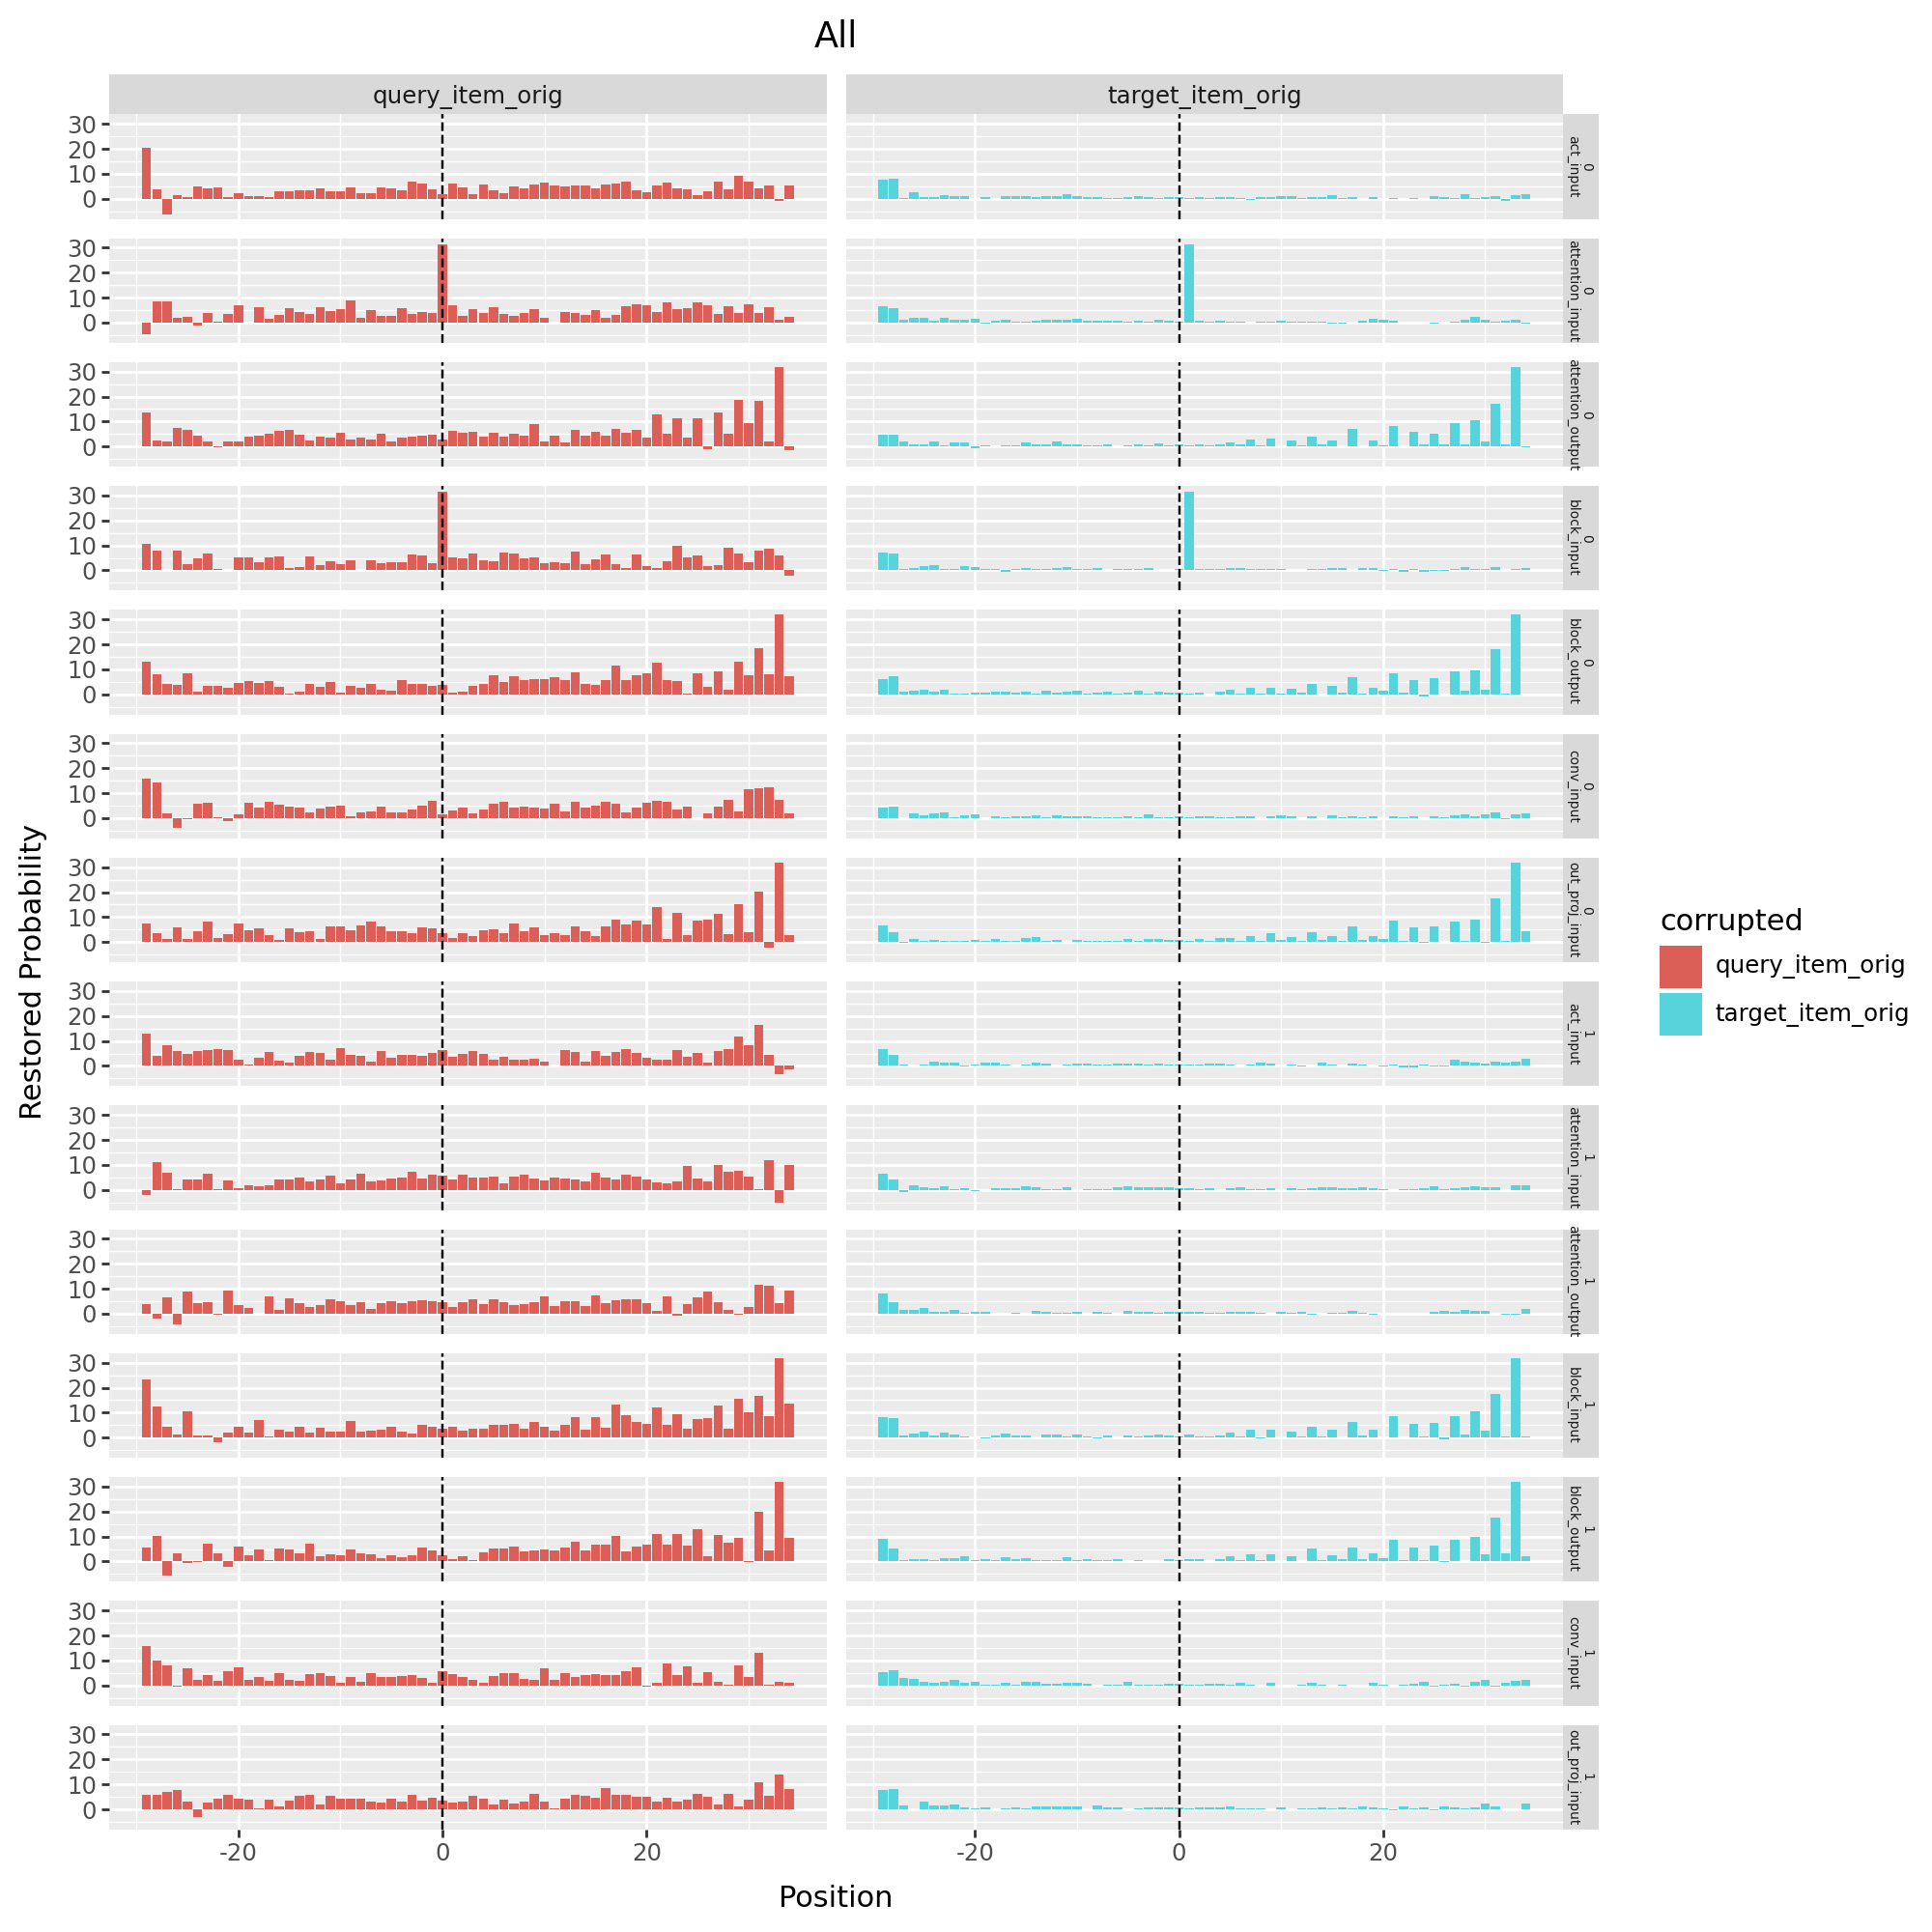

In [111]:
df = pd.DataFrame(data)
plot = (
    p9.ggplot(df, p9.aes(x="pos_diff", y="metric", fill="corrupted"))
    + p9.geom_bar(stat="summary")
    + p9.facet_grid("layer + component ~ corrupted")
    + p9.labs(x="Position", y="Restored Probability")
    + p9.geom_vline(xintercept=0, color="black", linetype="dashed")
    # + p9.geom_text(df[(df["restored_prob"] > 0.1)], p9.aes(x="pos_diff", y="restored_prob", label="pos"), size=5, nudge_y=0.03)
    + p9.ggtitle(f"All")
    + p9.theme(
        strip_text_y=p9.element_text(size=5),
        figure_size=(10, 10),
    )
)
plot.show()

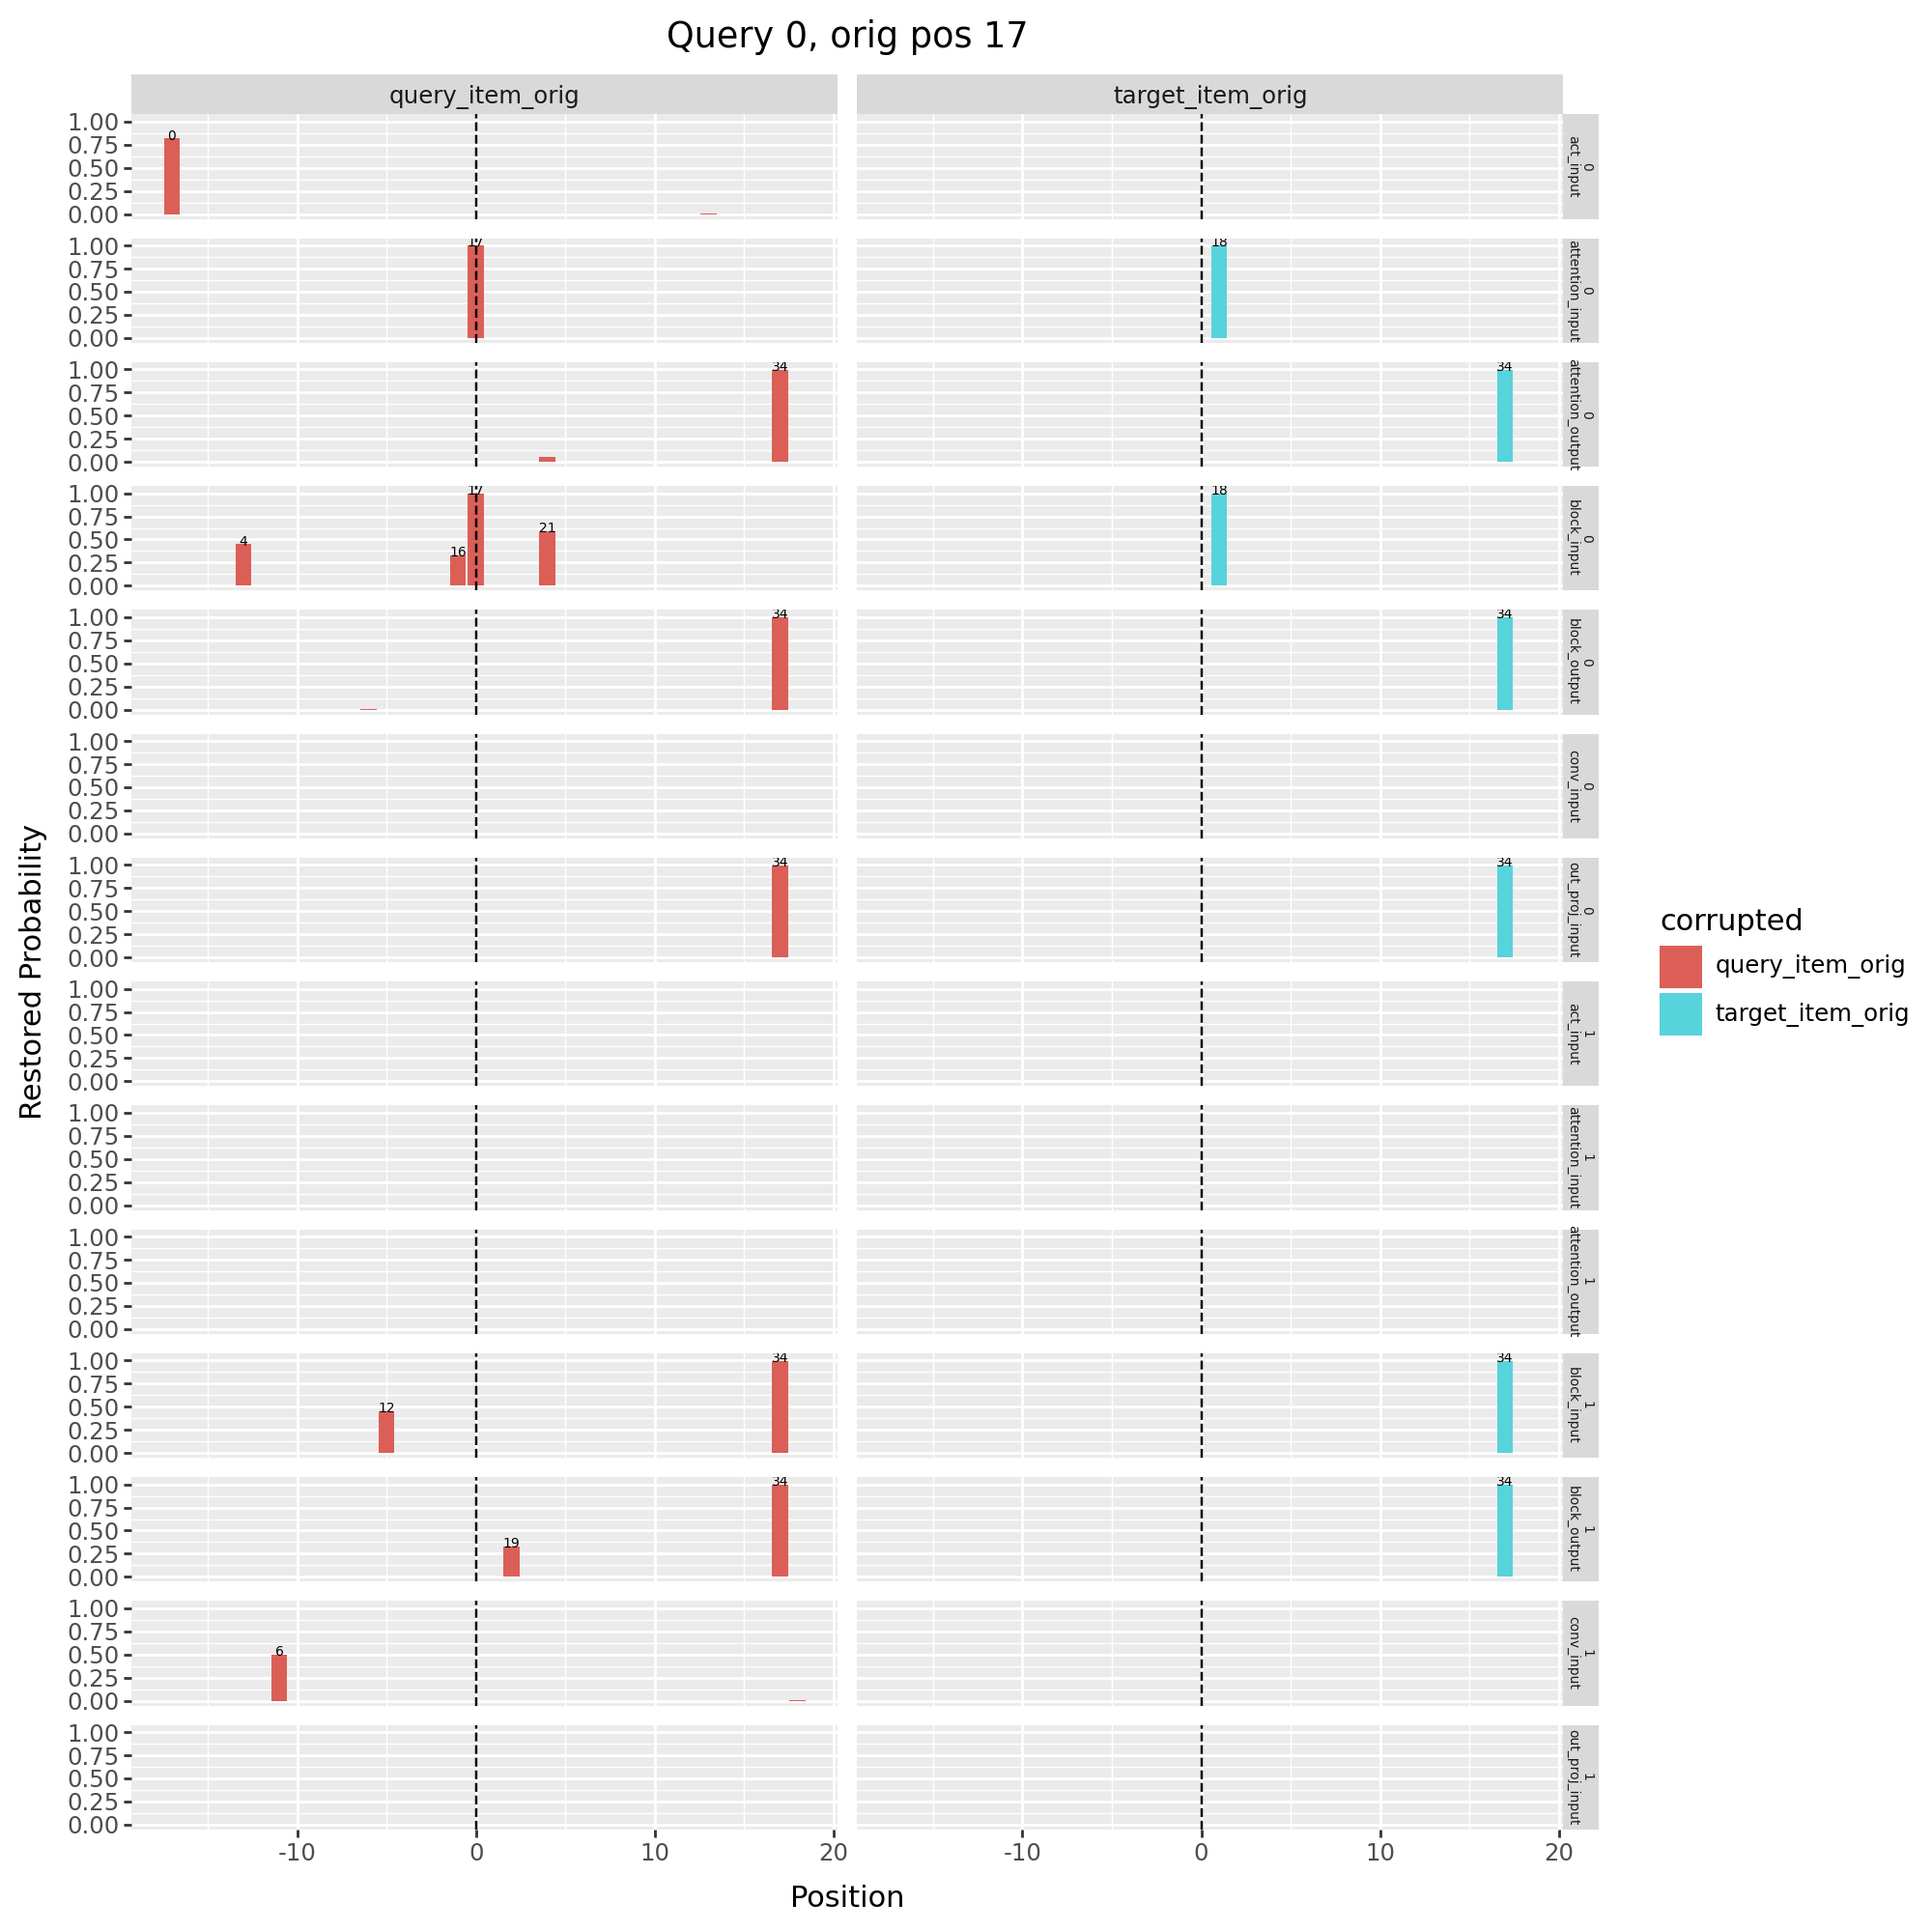

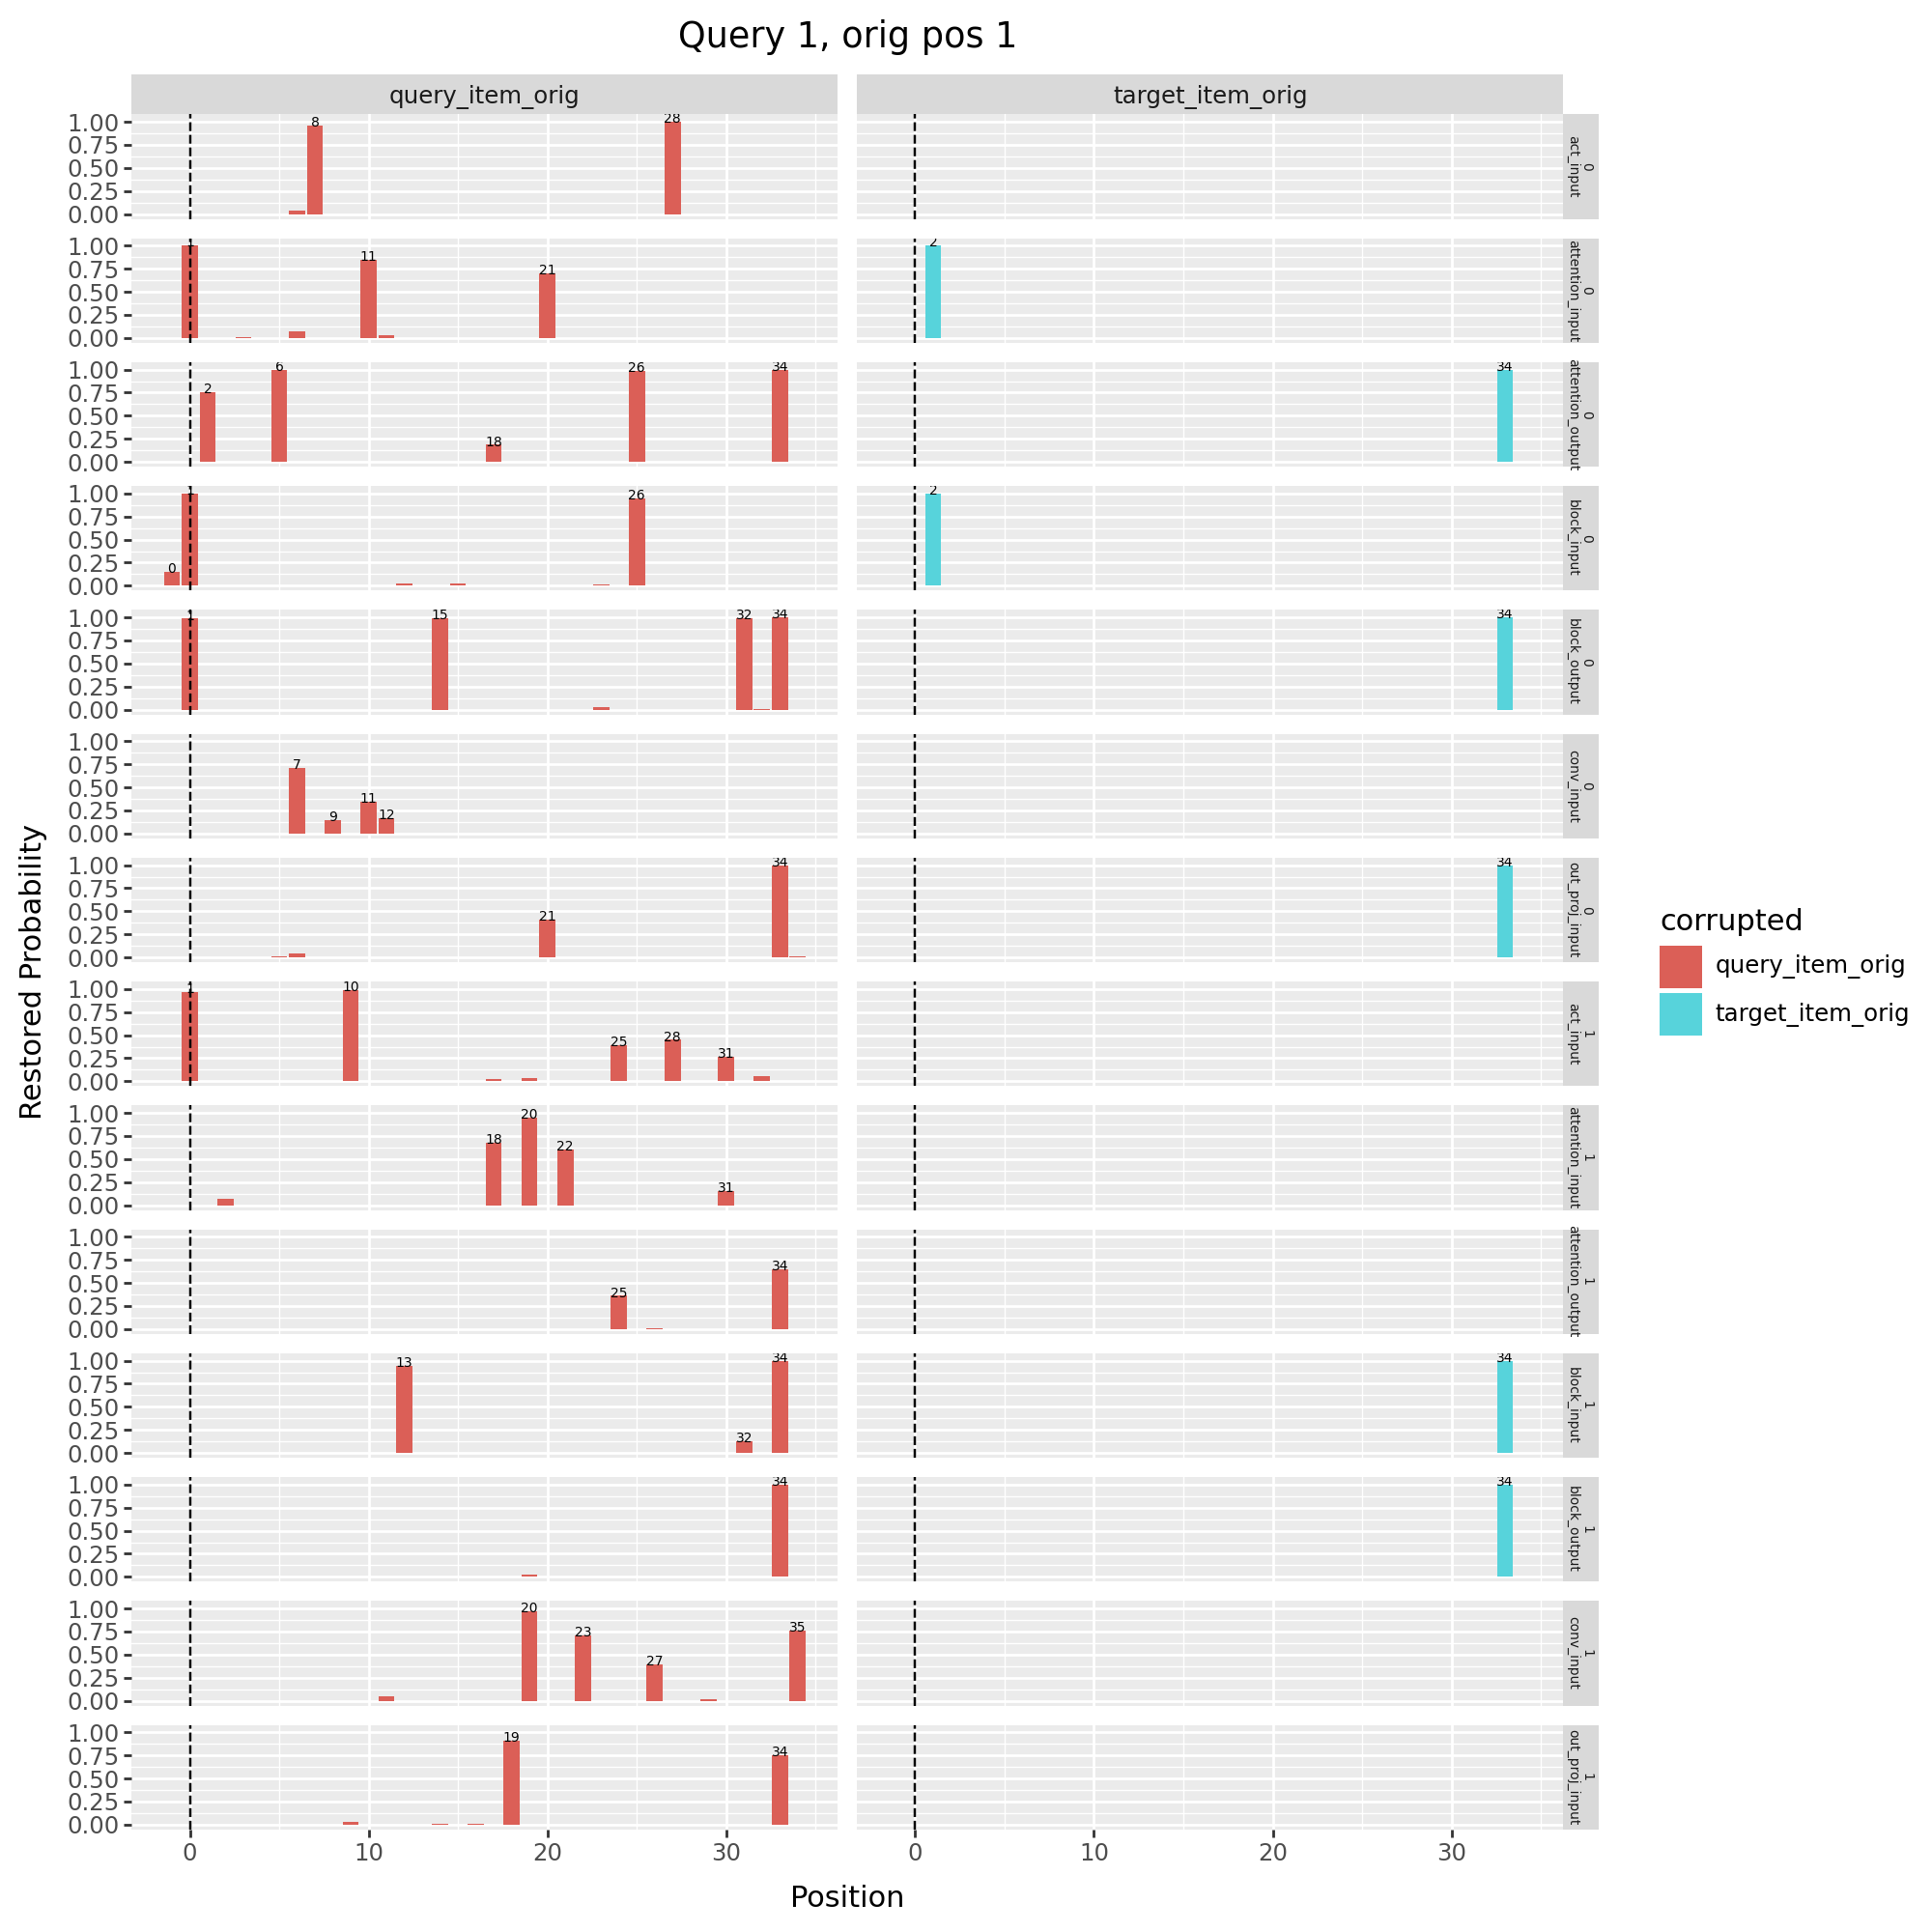

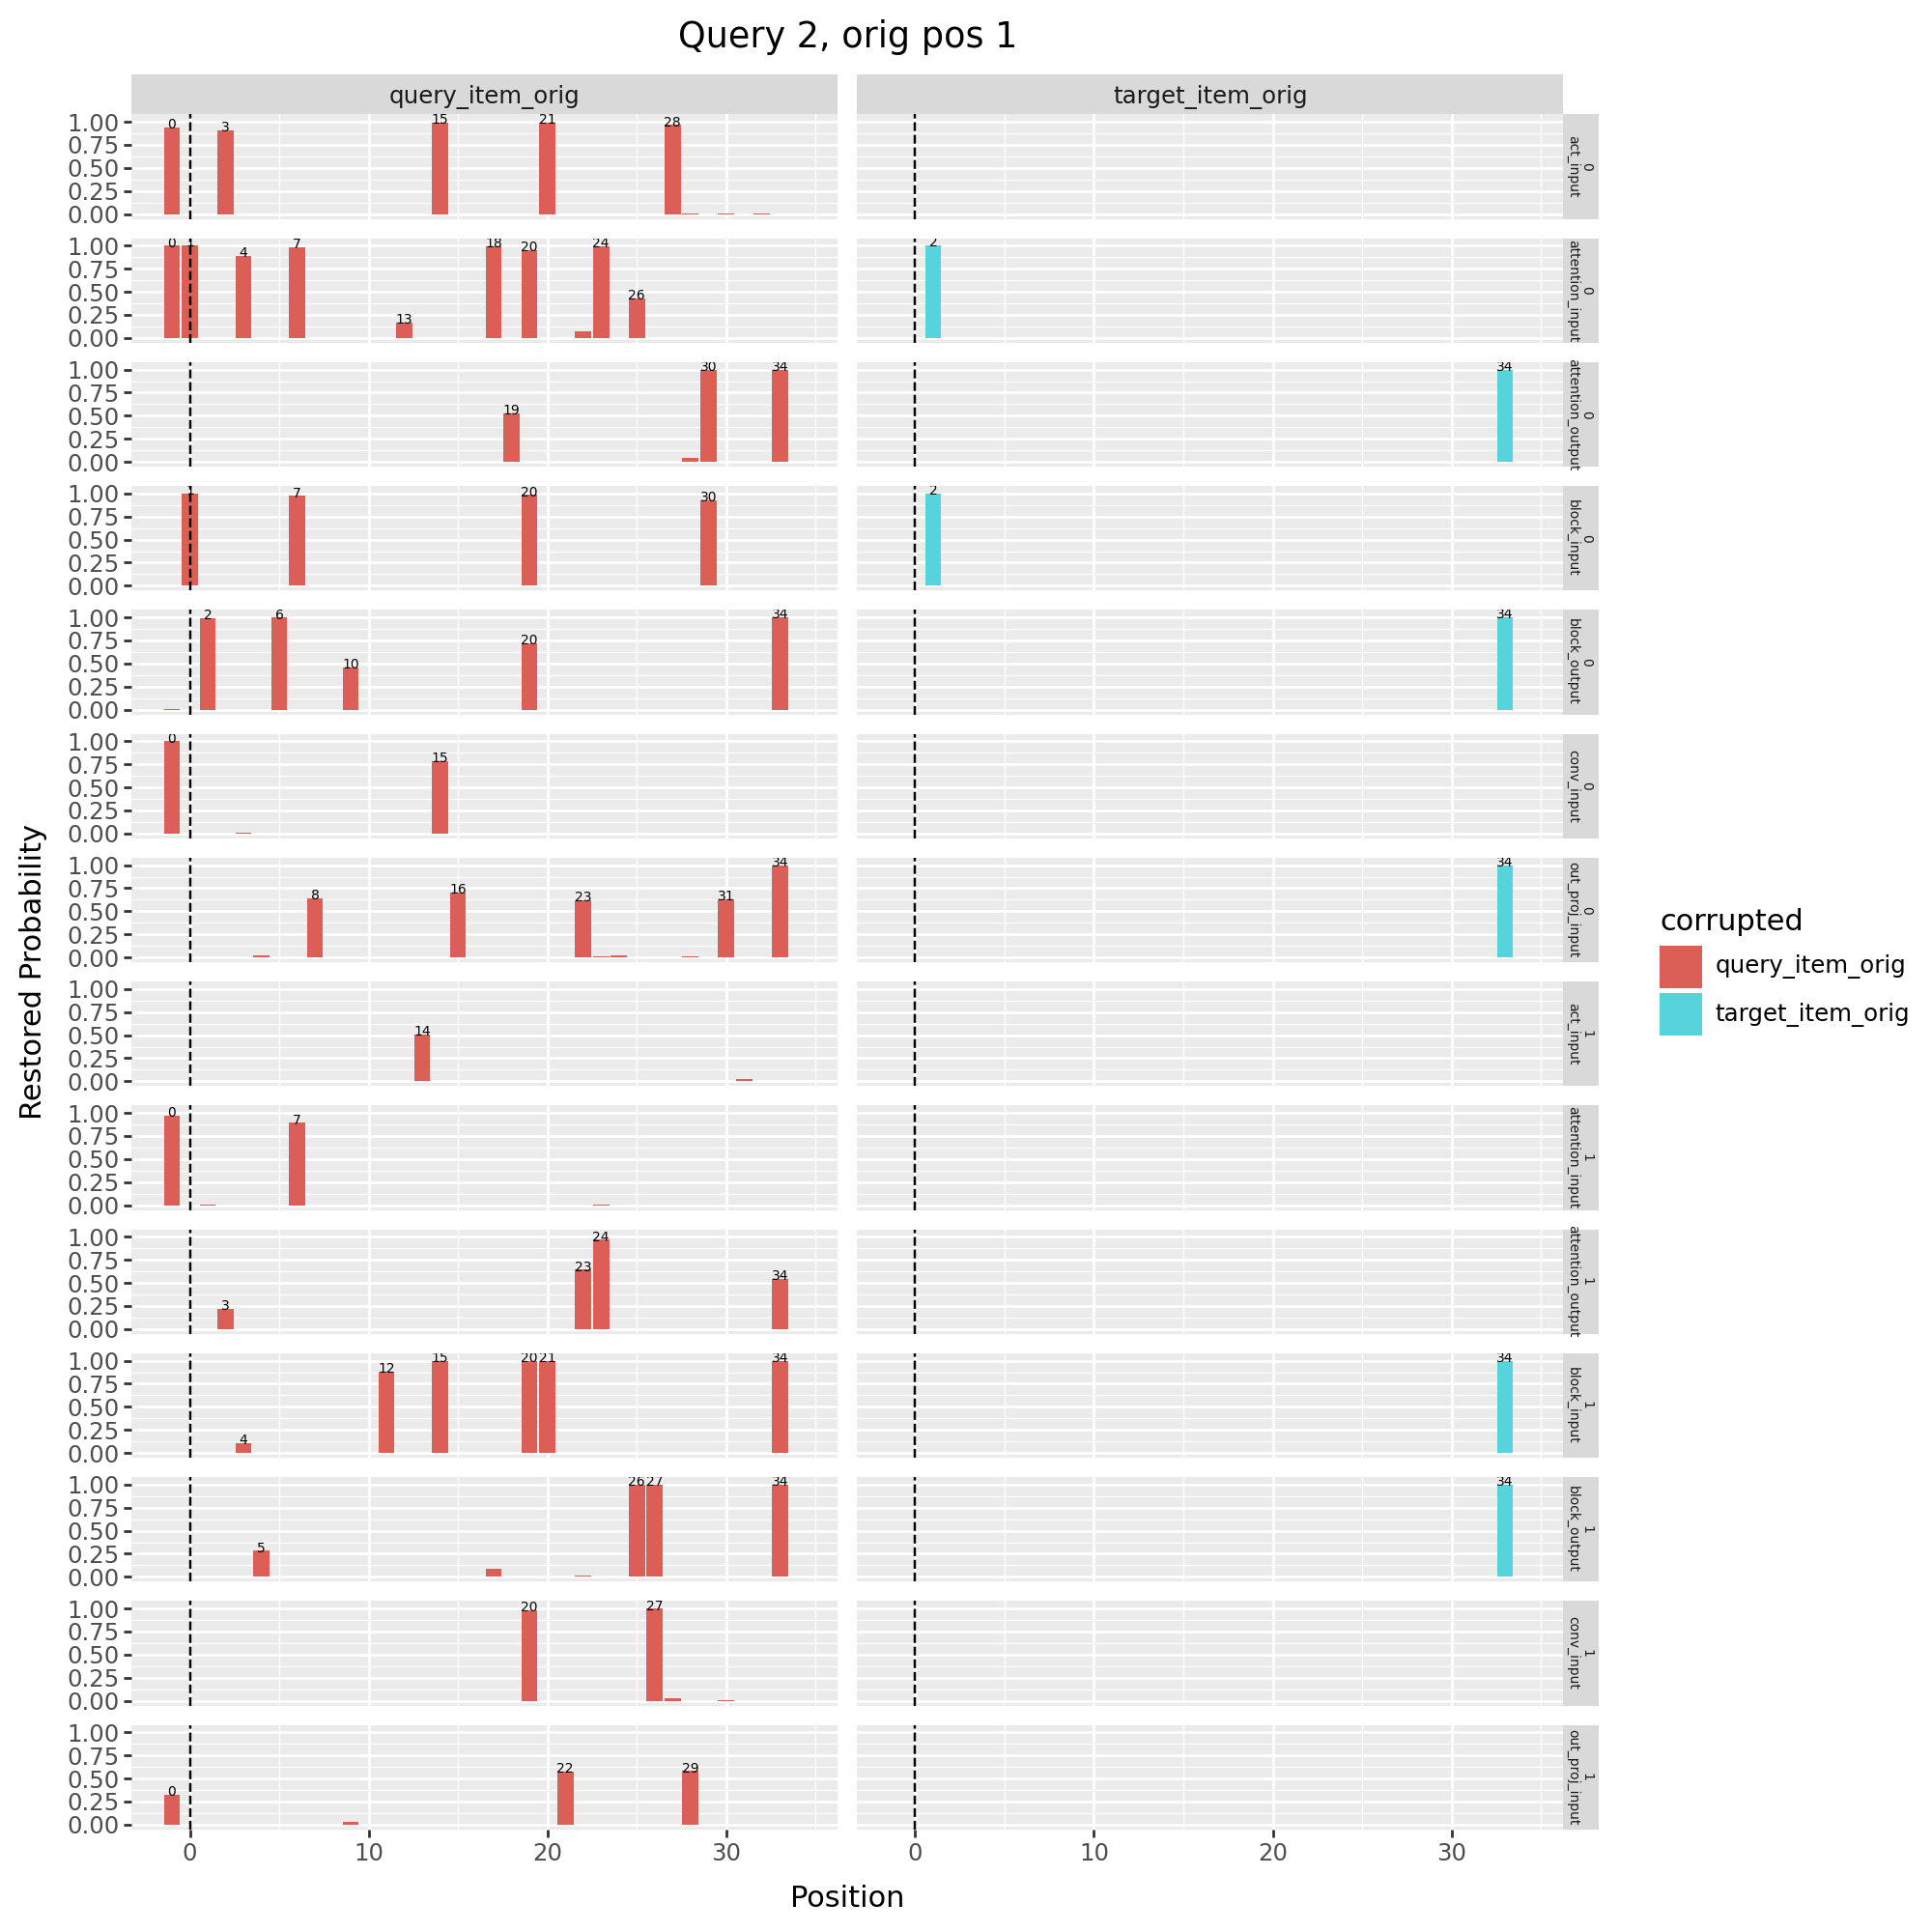

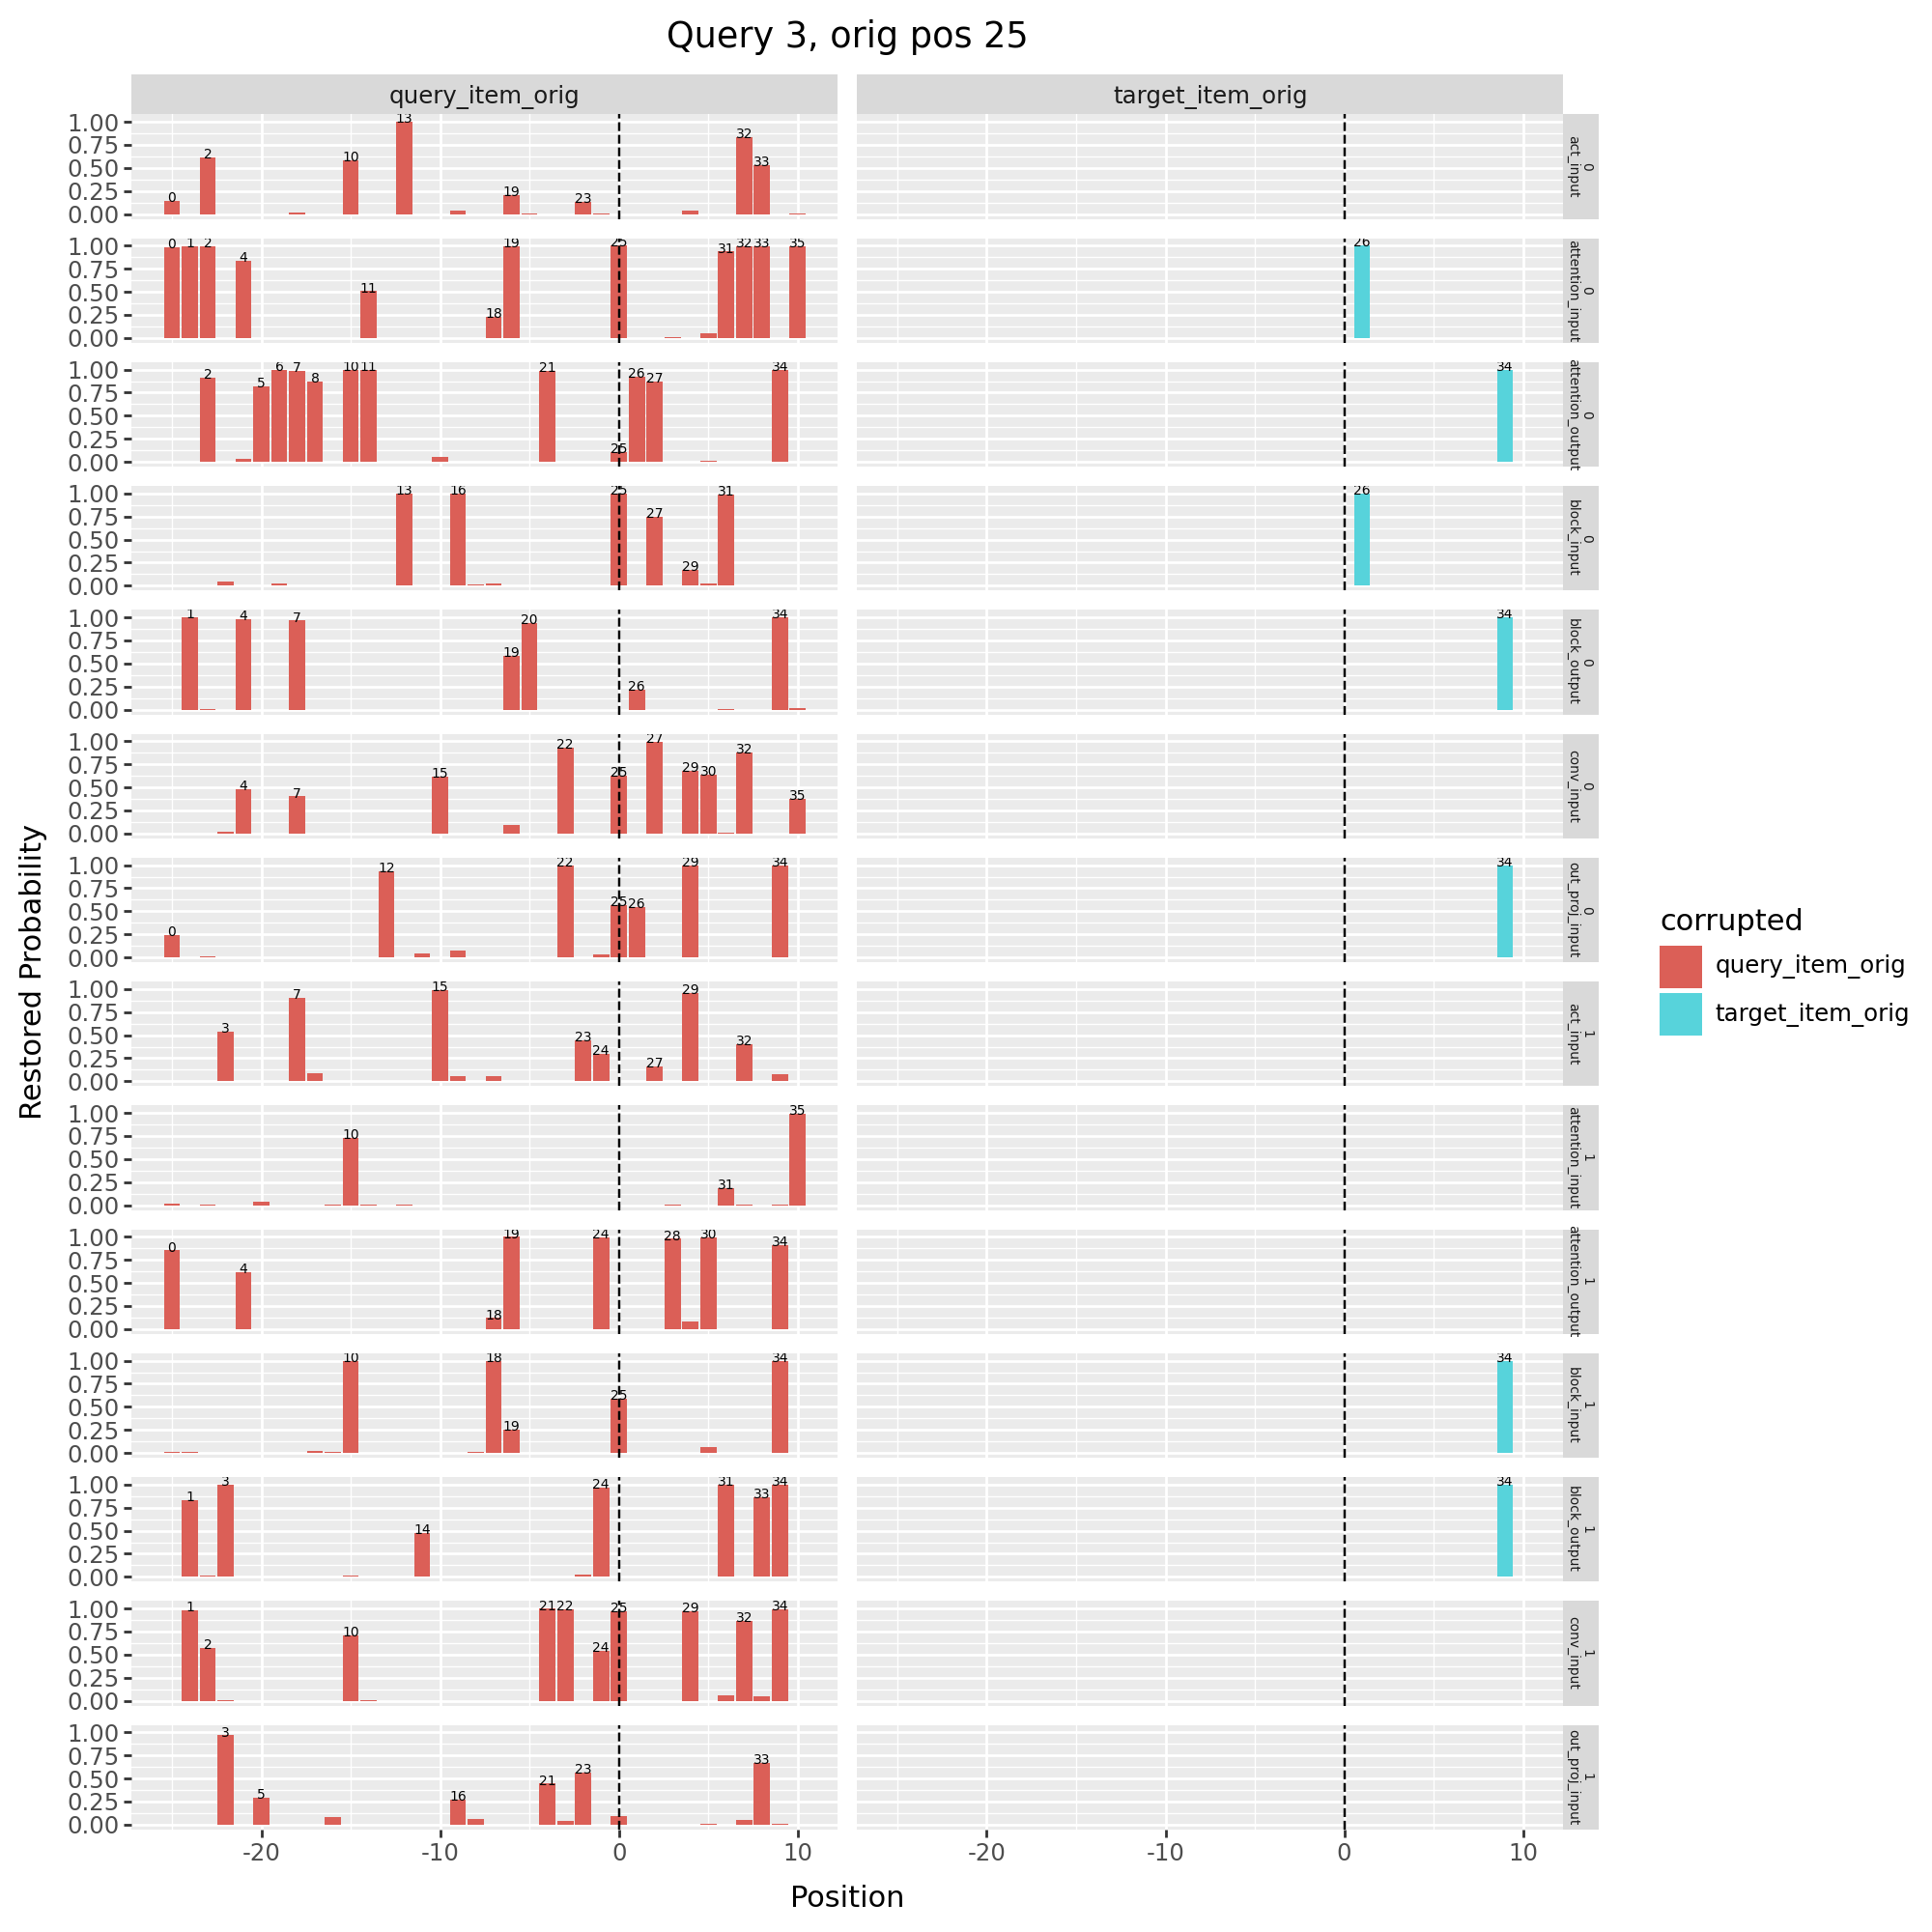

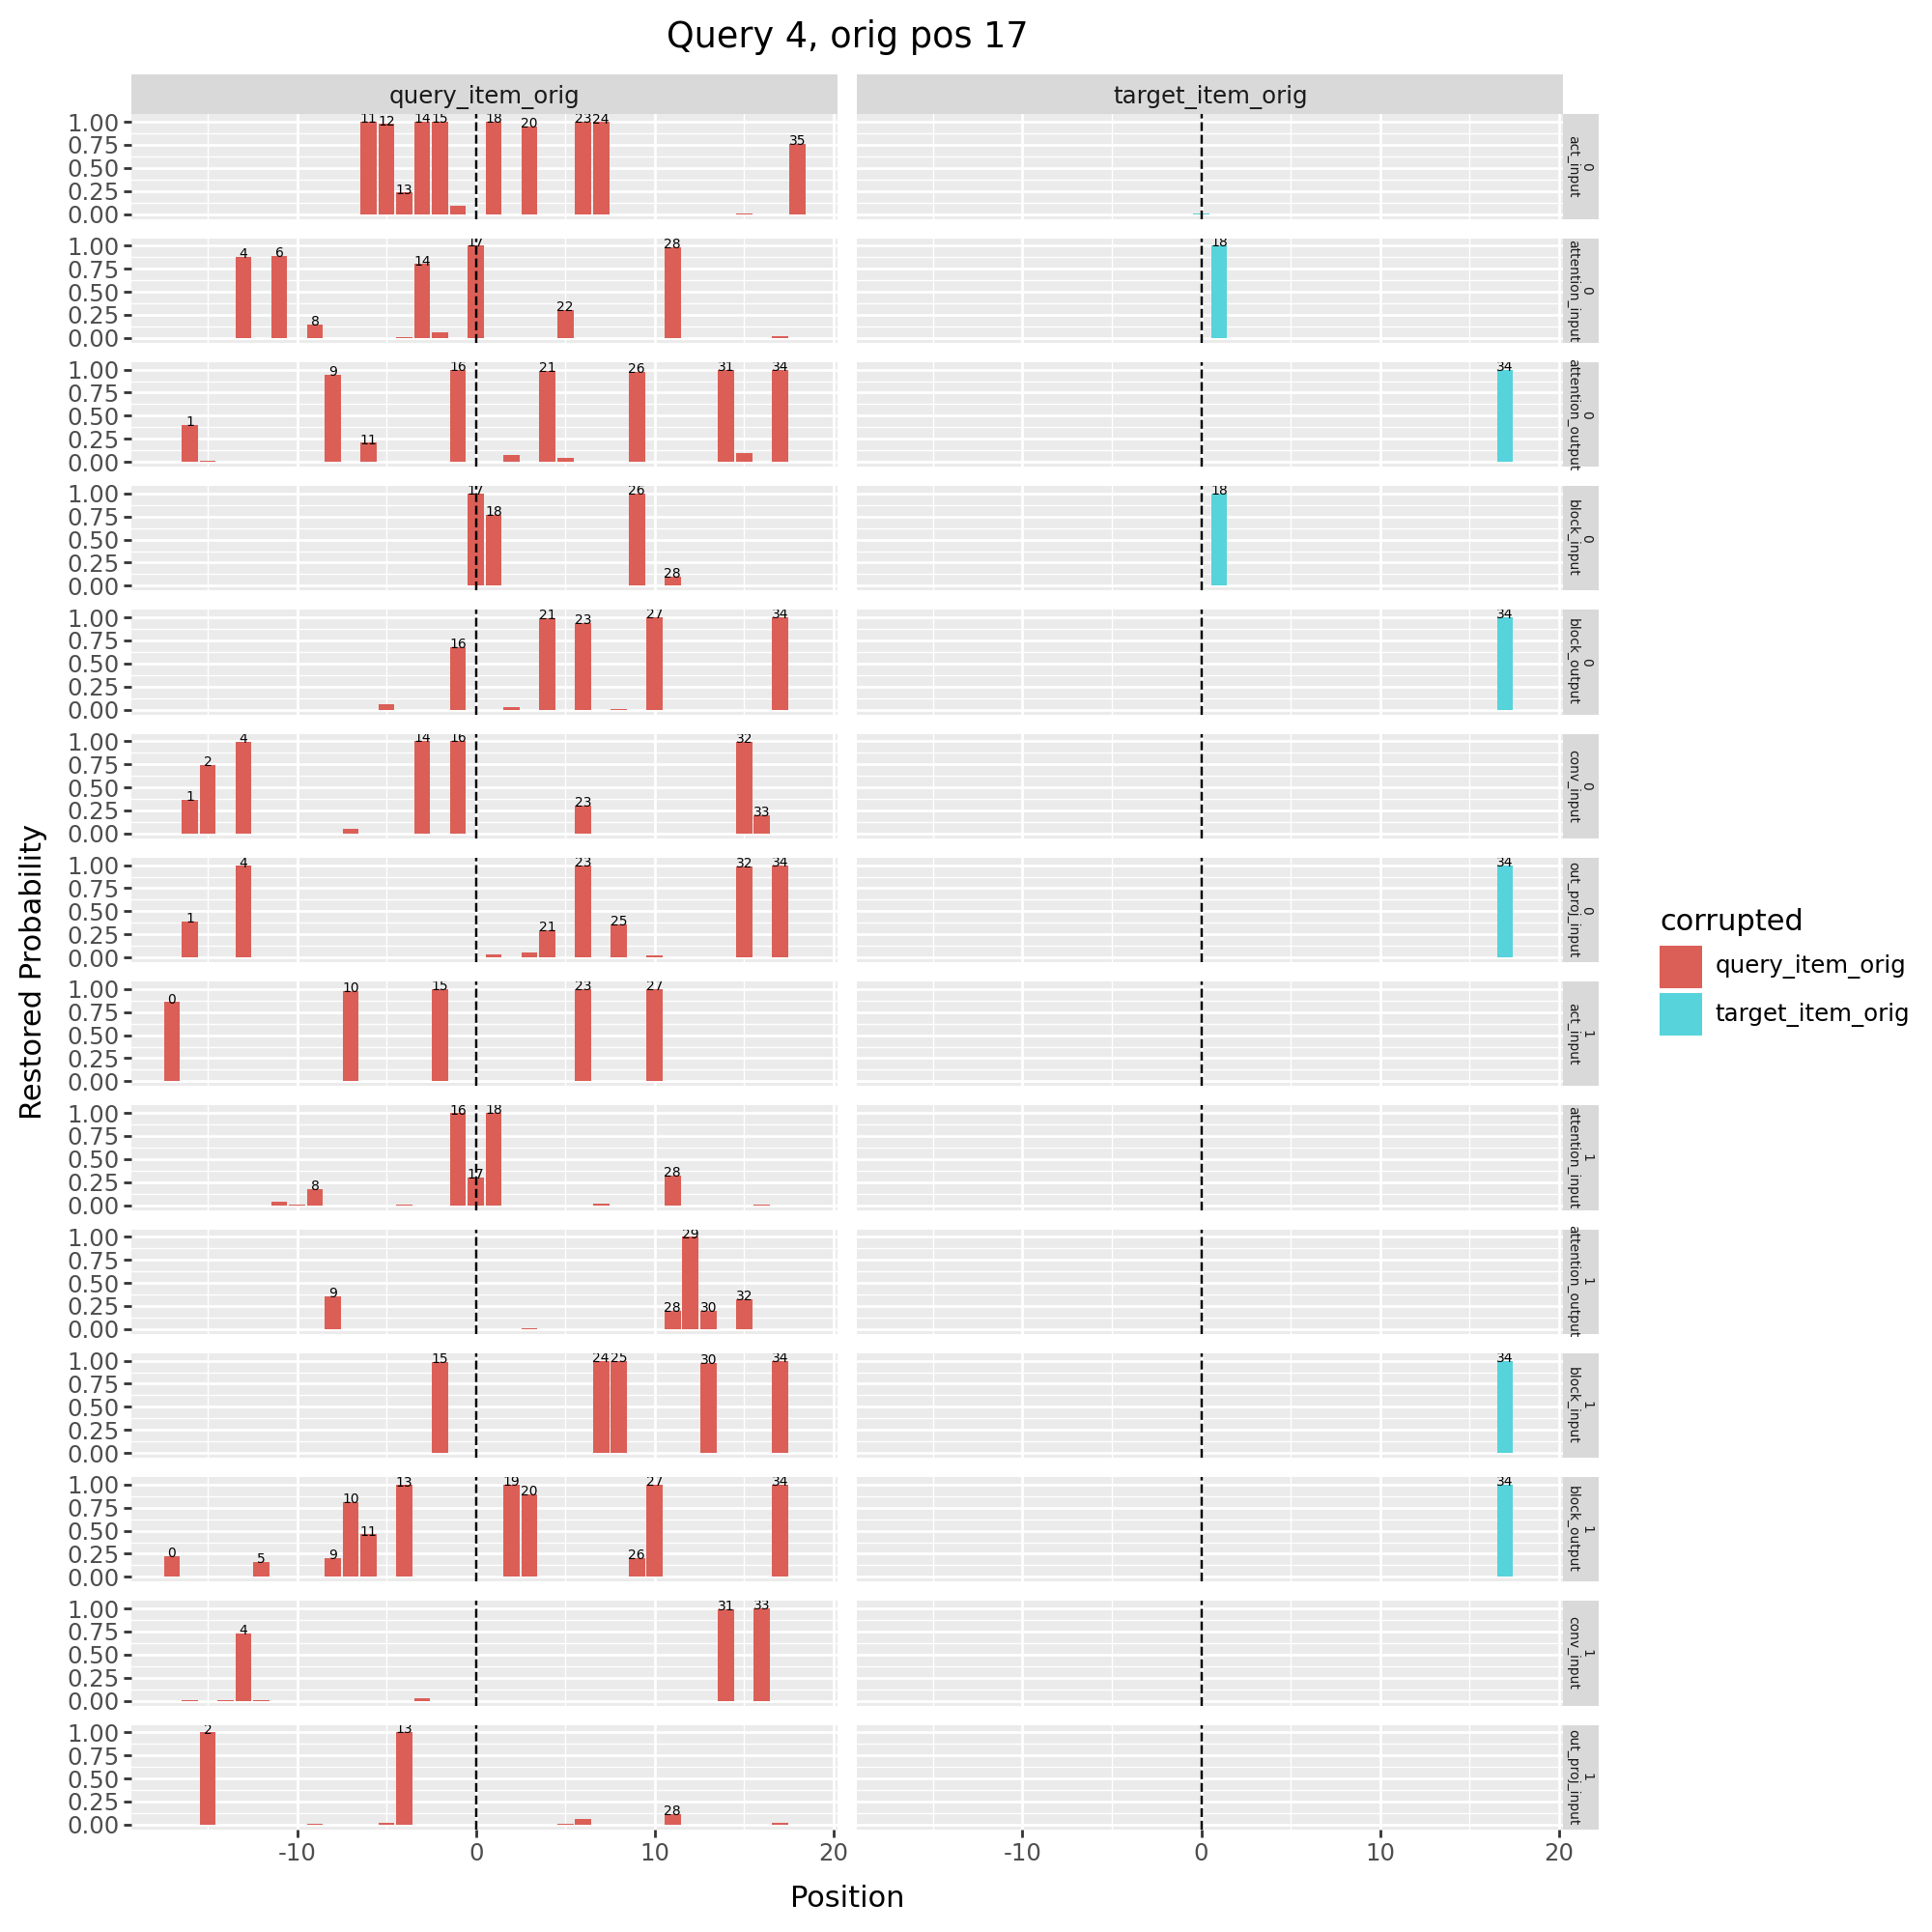

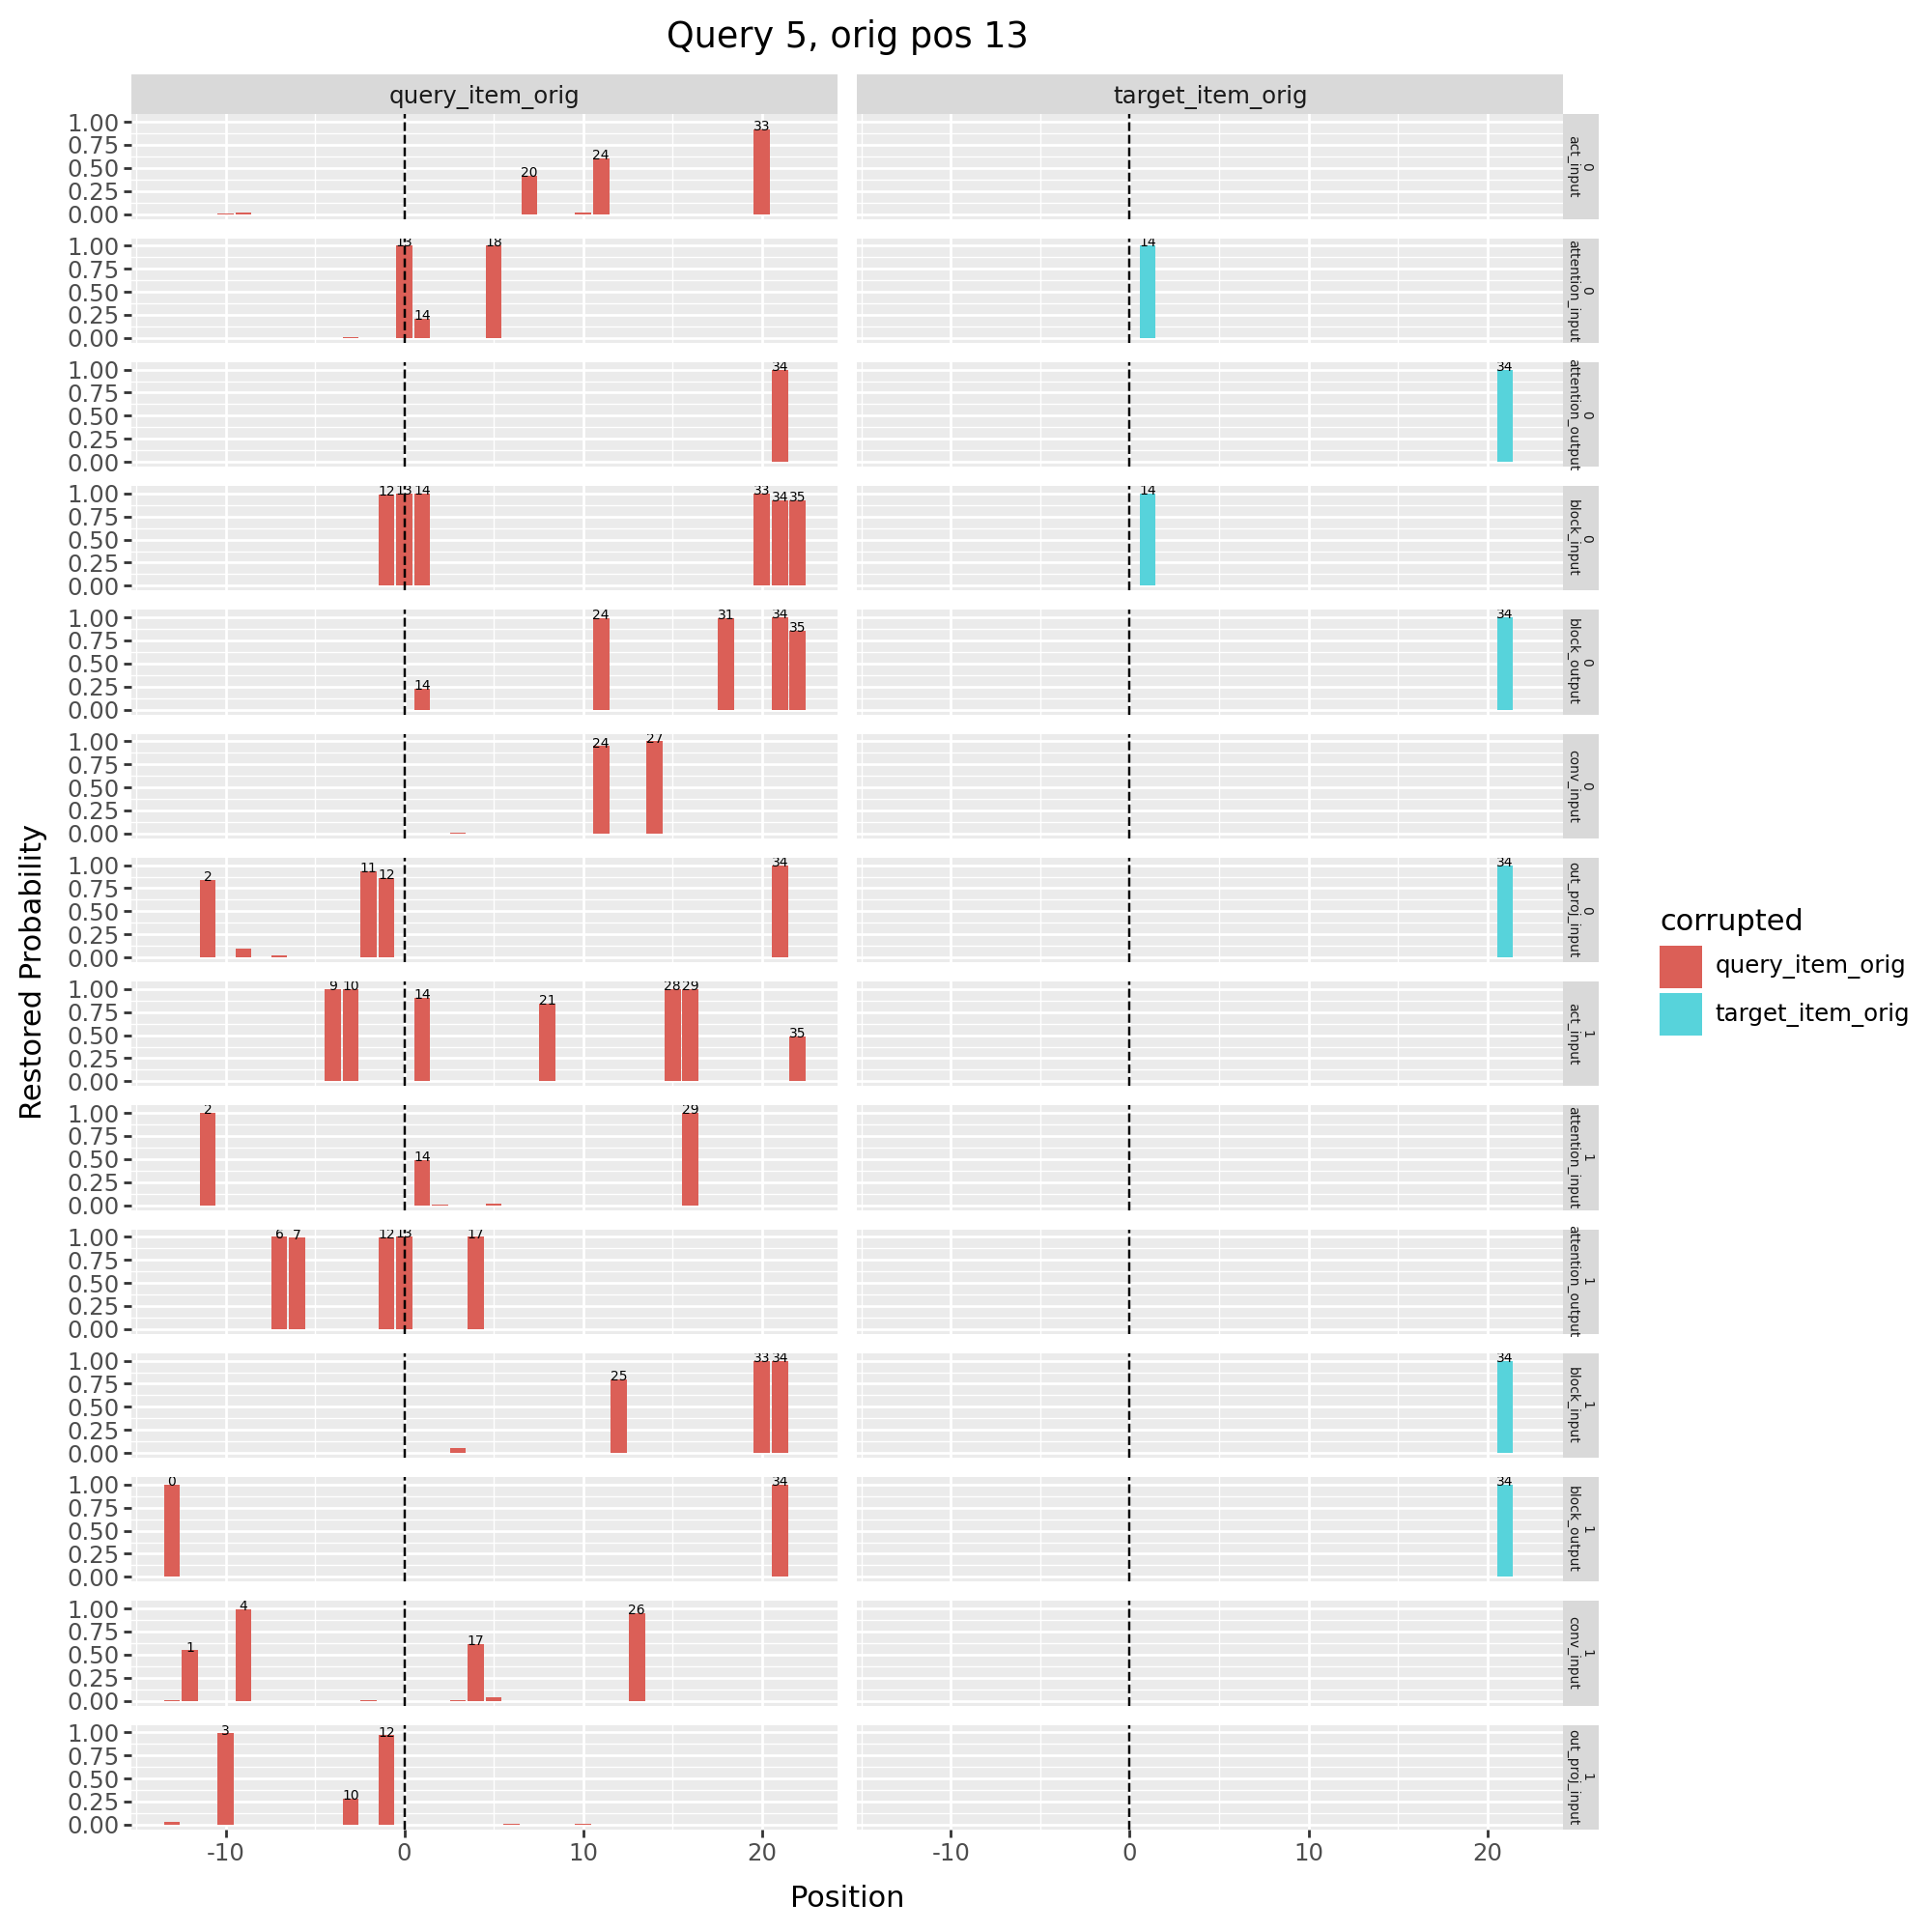

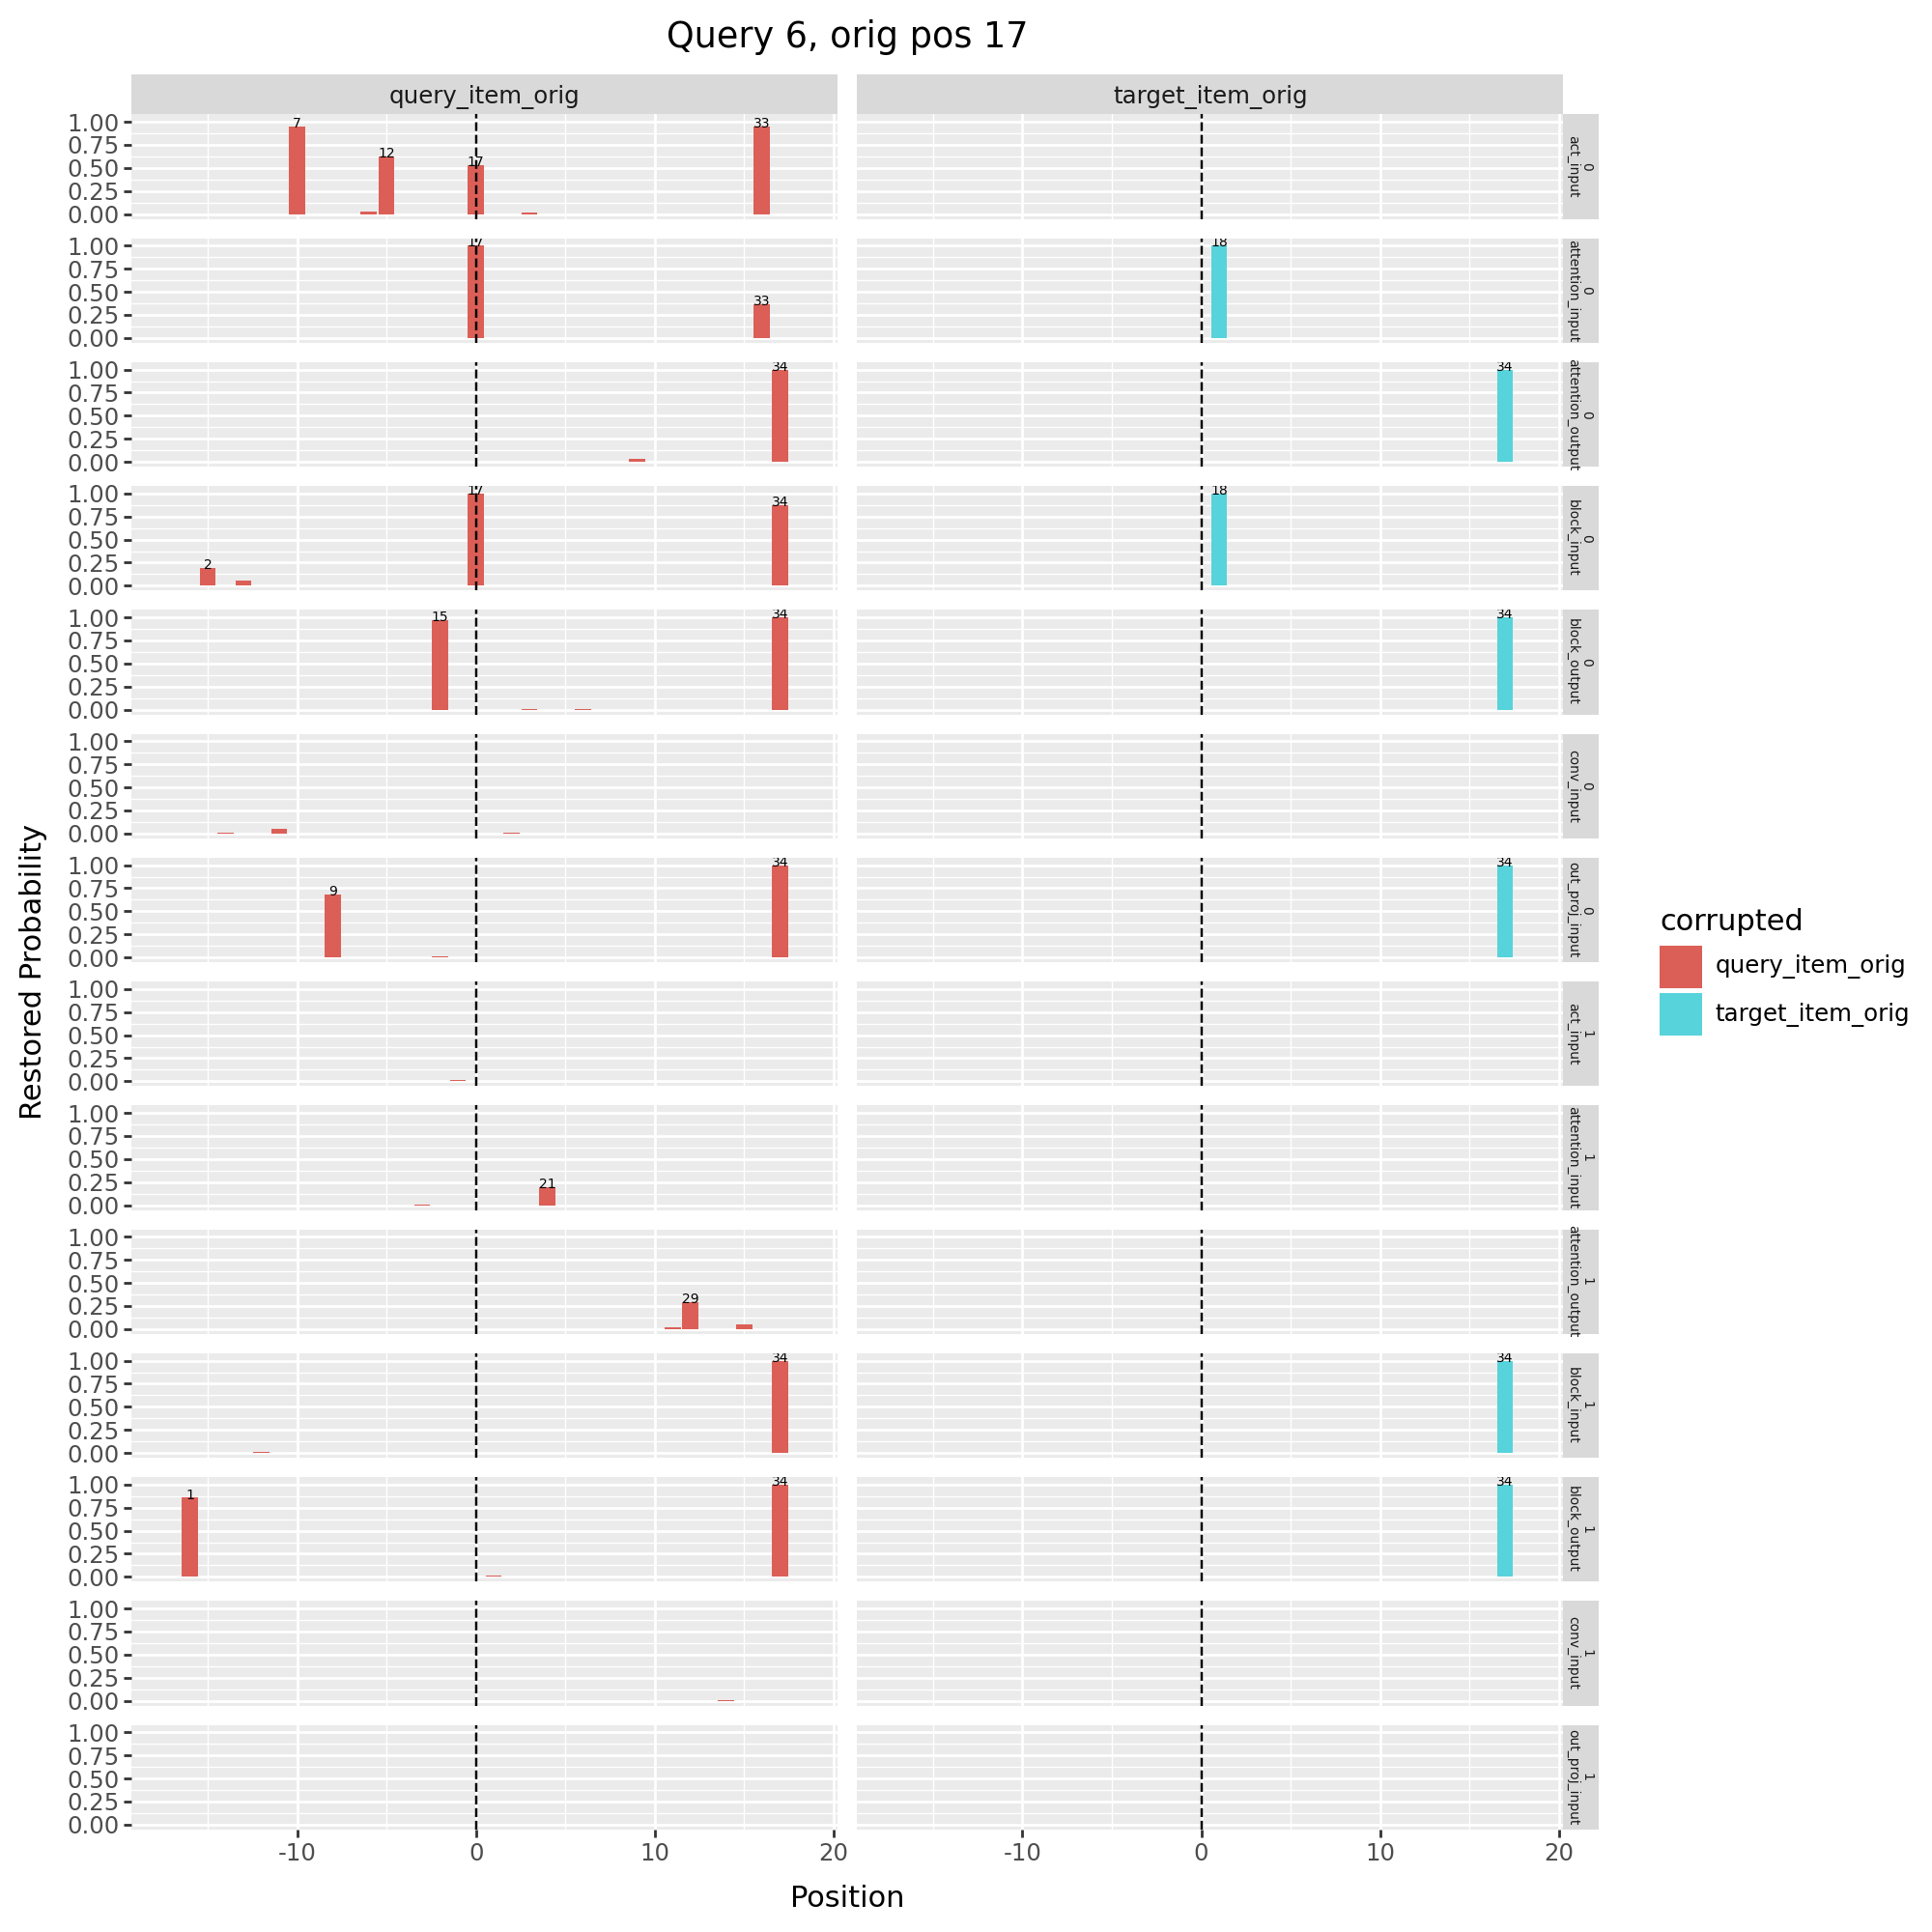

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f9776b9a990>>
Traceback (most recent call last):
  File "/nlp/scr/aryaman/tinylang/.venv/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


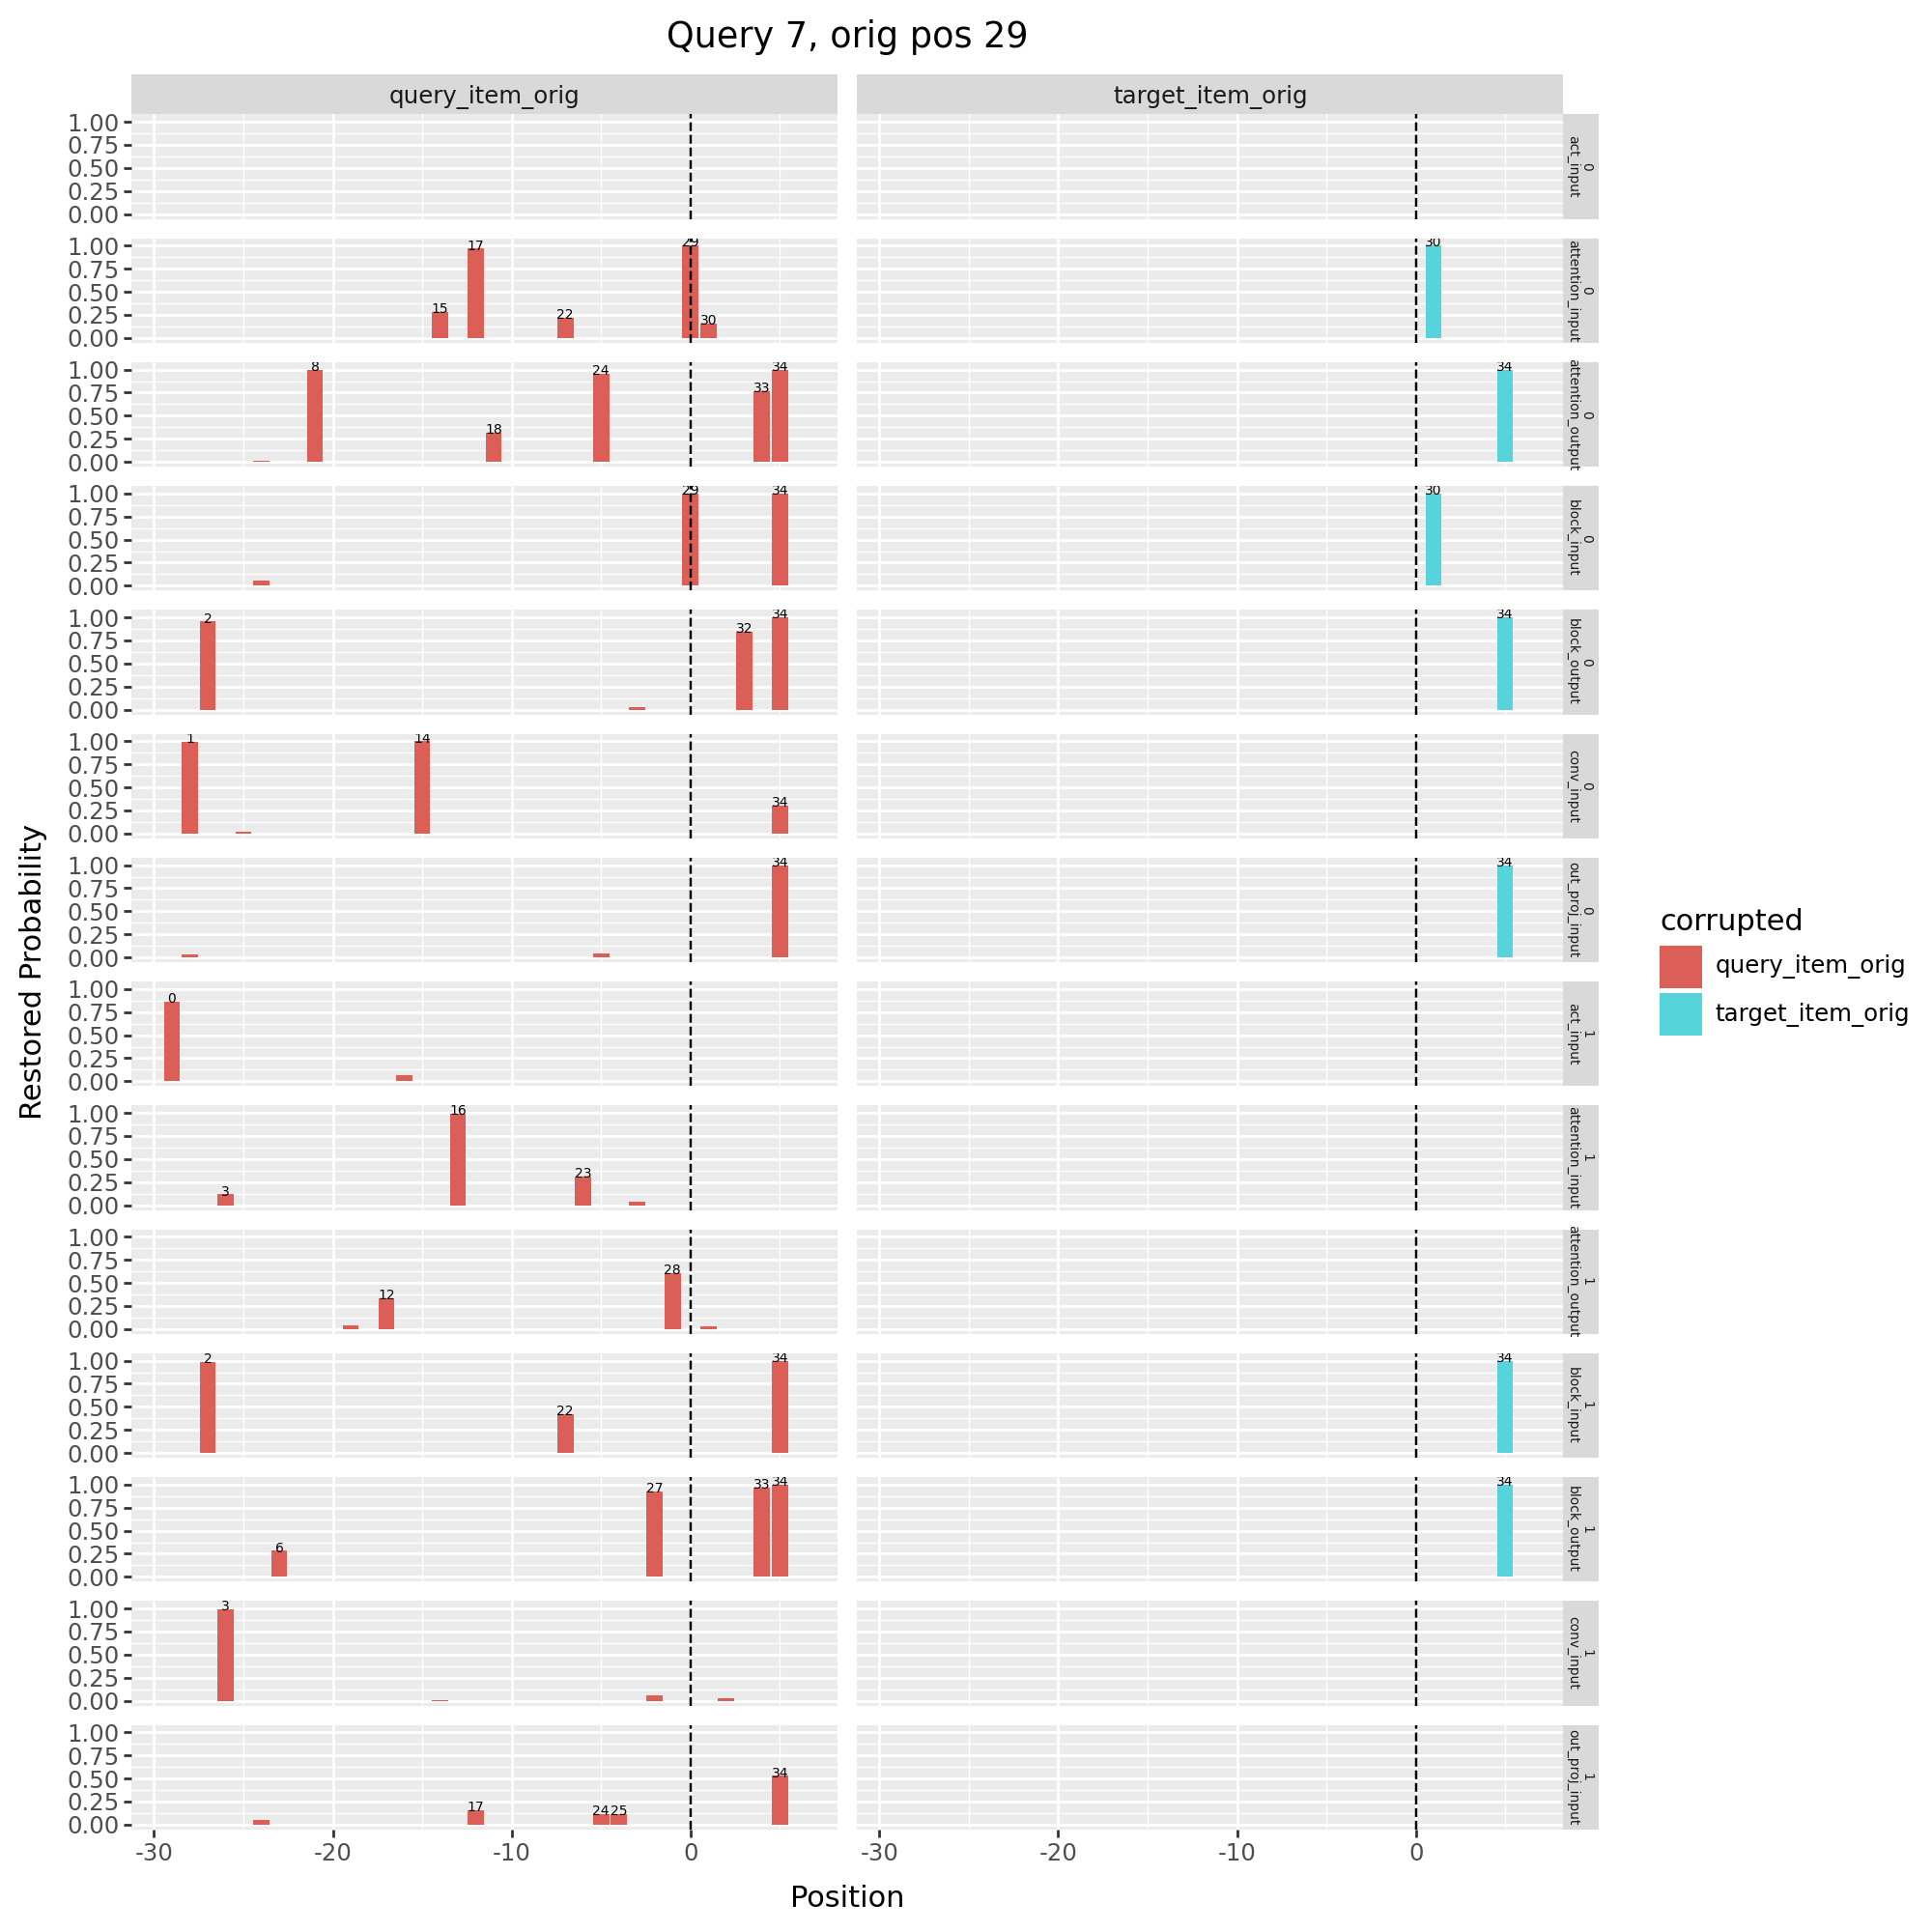

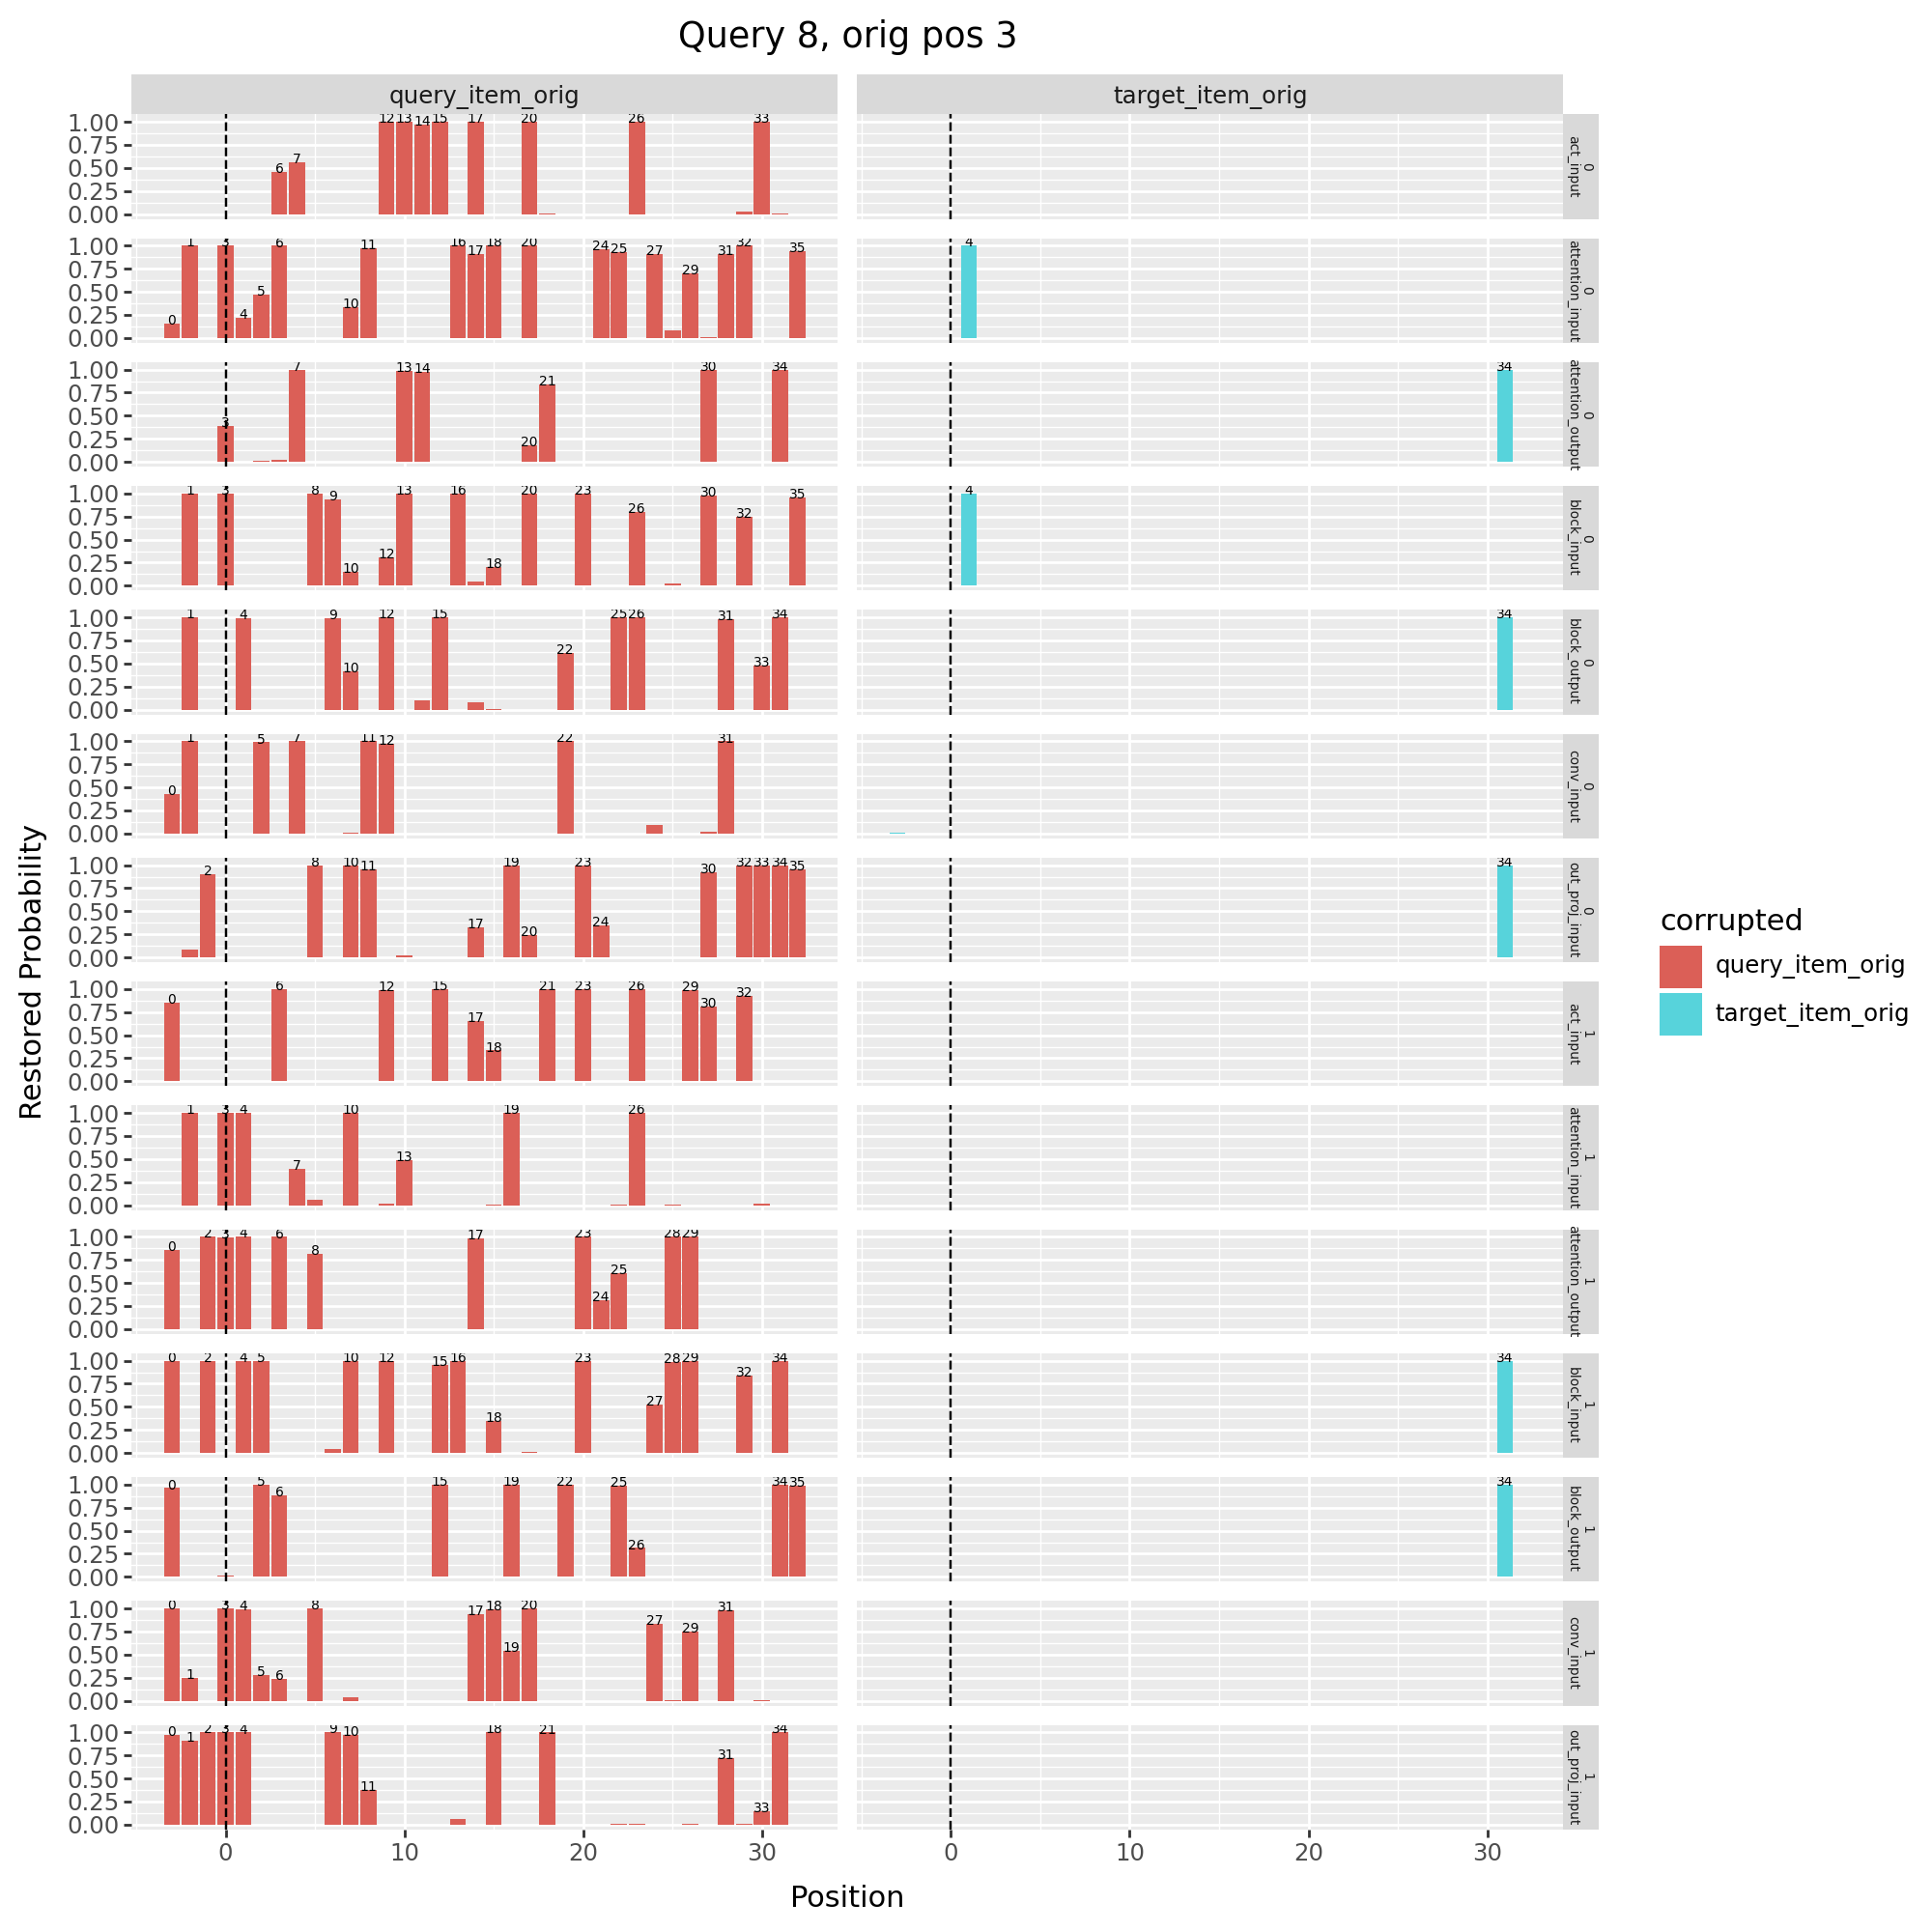

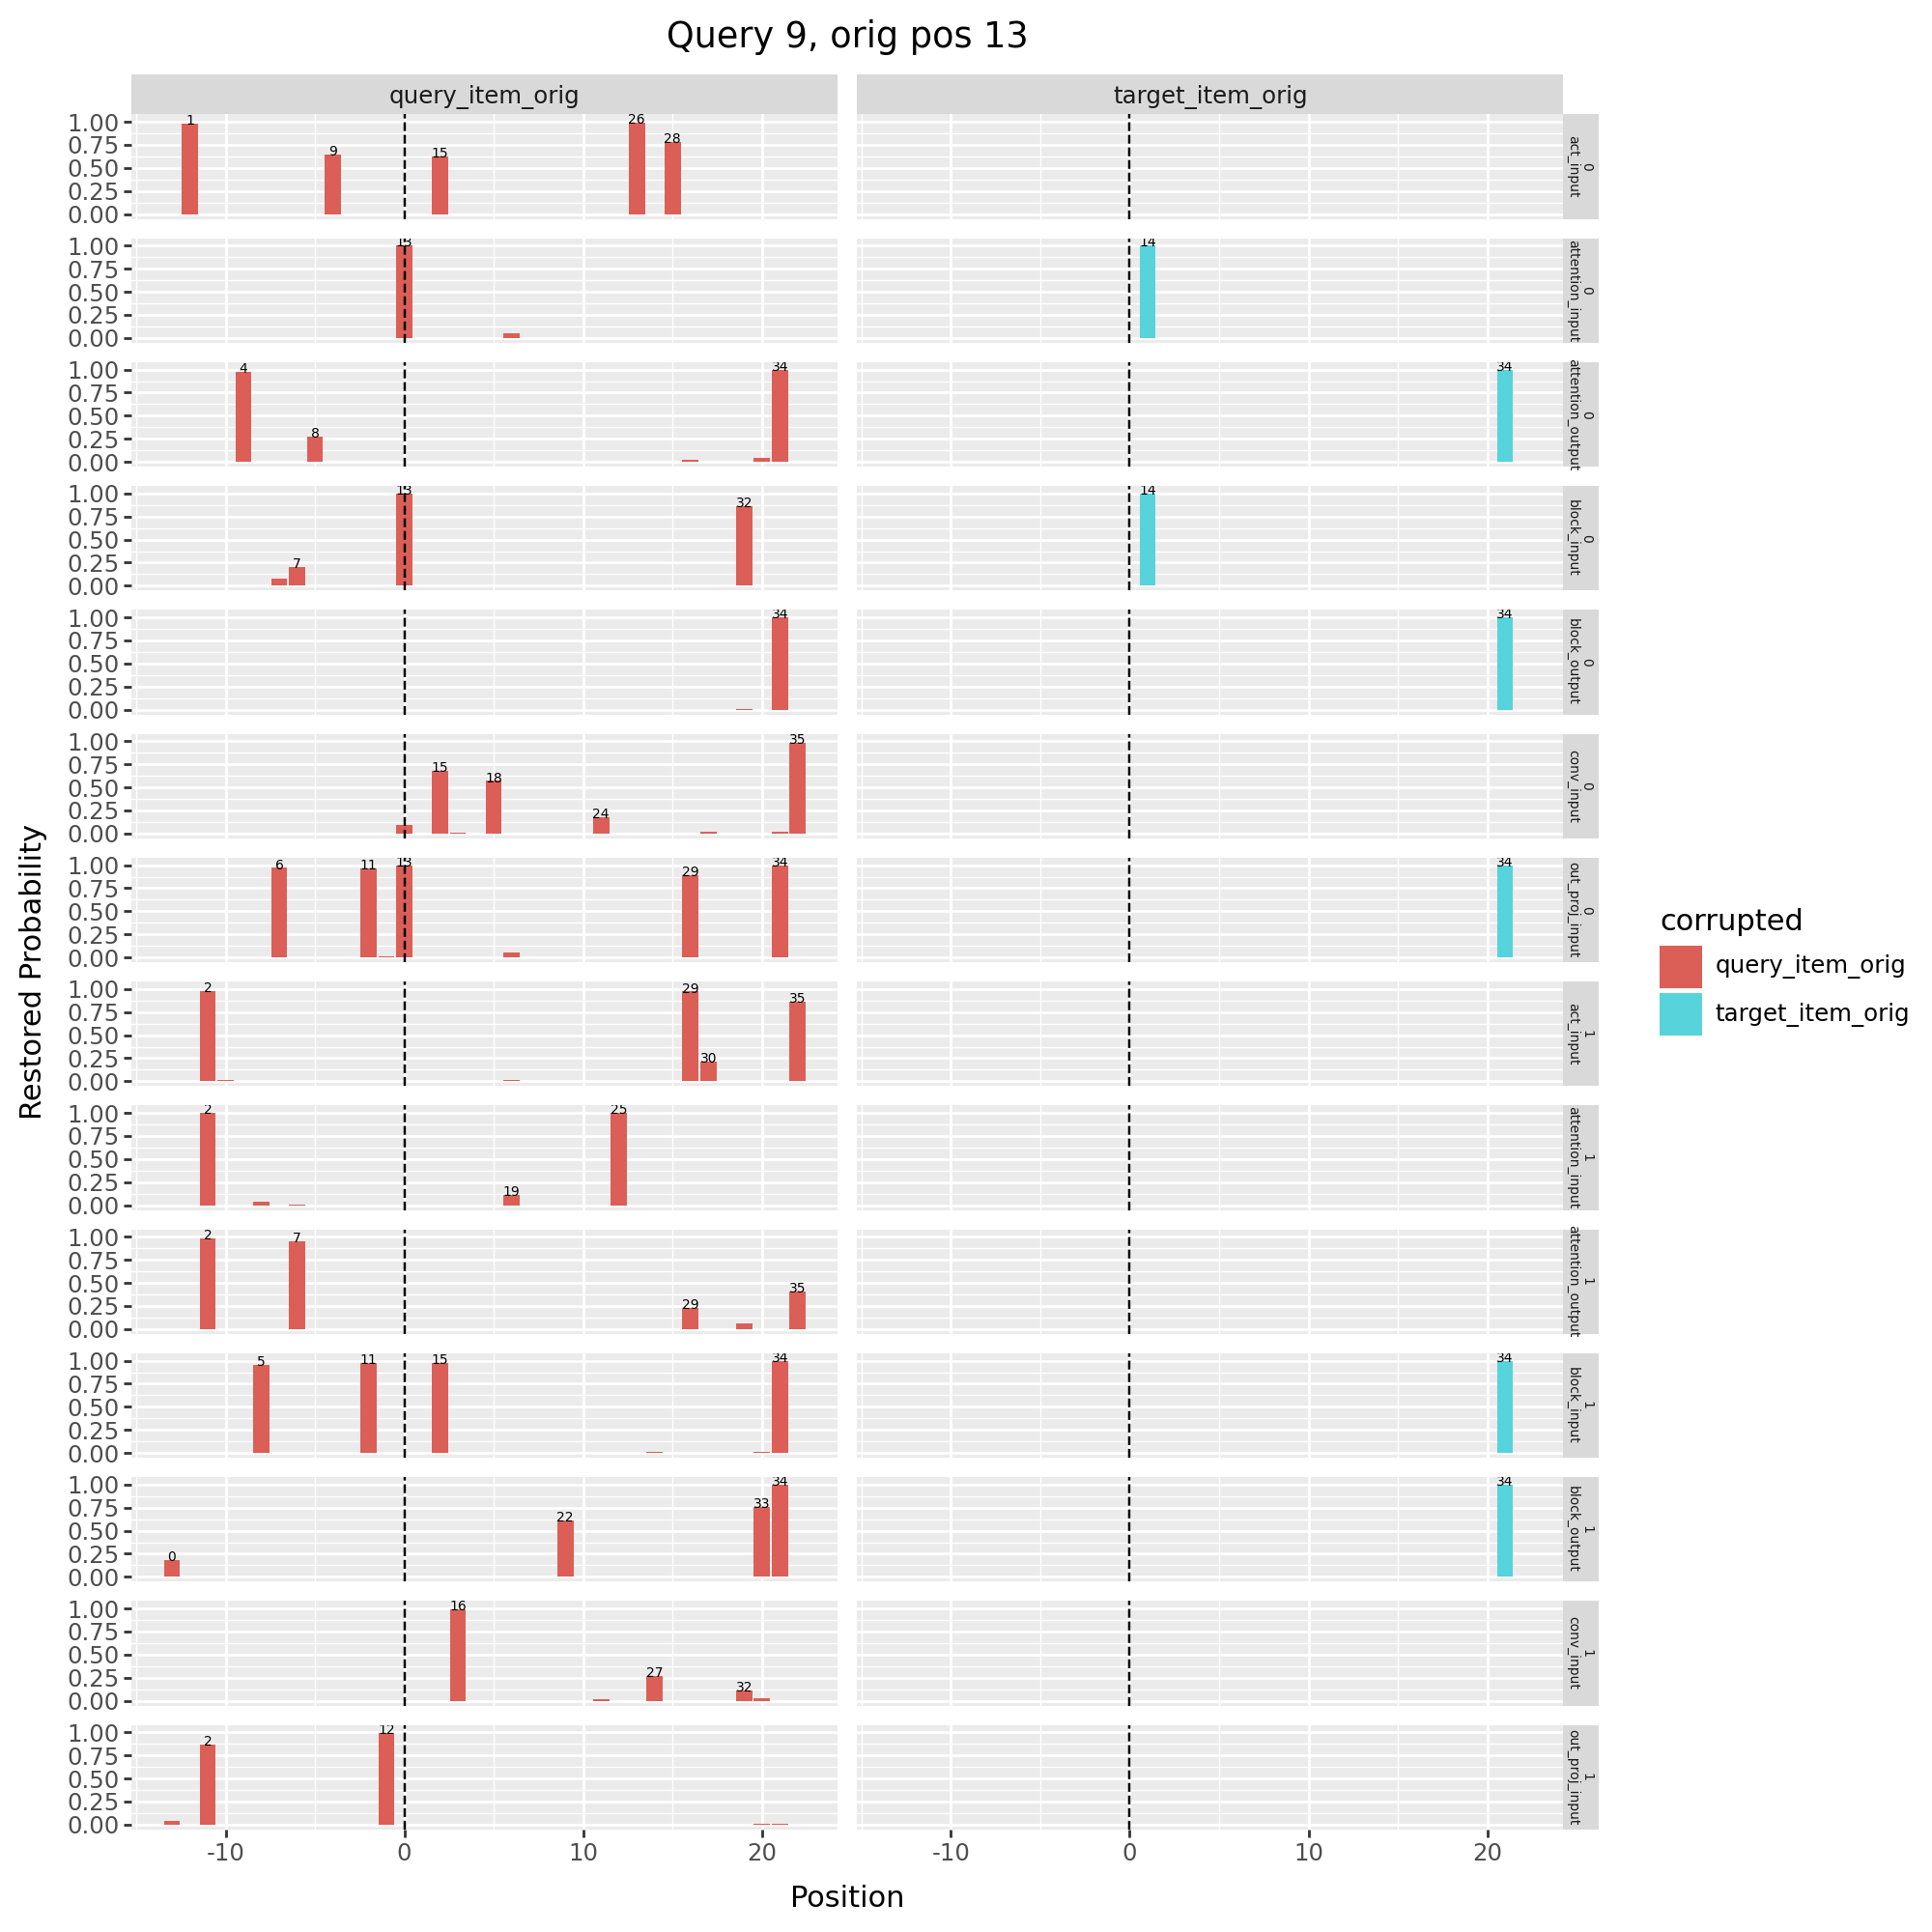

In [84]:
df = pd.DataFrame(data)
for idx in df["idx"].unique():
    query_item_orig_pos = exp.language.evalsets["test"]["probing_schemas"][idx]['queries']['query_item_orig']['pos']
    plot = (
        p9.ggplot(df[df["idx"] == idx], p9.aes(x="pos_diff", y="restored_prob", fill="corrupted"))
        + p9.geom_bar(stat="identity")
        + p9.facet_grid("layer + component ~ corrupted")
        + p9.labs(x="Position", y="Restored Probability")
        + p9.geom_vline(xintercept=0, color="black", linetype="dashed")
        + p9.geom_text(df[(df["idx"] == idx) & (df["restored_prob"] > 0.1)], p9.aes(x="pos_diff", y="restored_prob", label="pos"), size=5, nudge_y=0.03)
        + p9.ggtitle(f"Query {idx}, orig pos {query_item_orig_pos}")
        + p9.theme(
            strip_text_y=p9.element_text(size=5),
            figure_size=(10, 10),
        )
    )
    plot.show()